# Loadin the Data

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (25,16)
mpl.rcParams['axes.grid'] = False

2023-06-21 19:56:58.767679: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# load data
df = pd.read_csv("Data/merged_cleaned_FE_imputed(v)_w.csv")
df["Date"] = pd.to_datetime(df["Date"])
not_indexed = [
       "ProductID", "Quantity", "Price_imputed", "Year"
]
print()

df_pivot = df.pivot_table(
    index=[col for col in list(df.columns) if col not in not_indexed],
    columns=["ProductID"],
    values="Quantity",
)

df_pivot['total_quantity_day'] = df_pivot.sum(axis=1)

#from the StoreID index select only id 4051653300272
df_pivot = df_pivot.loc[df_pivot.index.get_level_values('StoreID') == 4051653300272]
#drop the StoreID index
df_pivot = df_pivot.droplevel('StoreID')
df_pivot = df_pivot.reset_index()

#convert all column names to string
df_pivot.columns = df_pivot.columns.astype(str)
df_pivot

ProductID,Date,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,windgusts_10m_max,windspeed_10m_max,...,4260705920539,4260705920546,4260705920553,4260705920560,4260705920577,4260705920584,4260705920591,4260705920607,4260705920638,total_quantity_day
0,2022-05-09,21.1,4.0,13.7,0.9,19.4,11.3,0.0,27.0,13.4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
1,2022-05-10,23.5,11.9,17.3,9.5,21.9,15.5,1.5,45.4,20.7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
2,2022-05-11,21.2,10.2,15.2,11.0,19.5,14.6,1.1,54.7,24.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
3,2022-05-12,17.7,10.0,13.9,7.4,14.4,11.0,0.9,55.1,29.3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
4,2022-05-13,16.9,8.7,12.9,6.5,12.9,10.2,2.3,64.1,25.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2023-01-31,6.7,3.3,4.4,-1.5,1.8,-0.2,5.2,75.6,30.7,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,36.0
268,2023-02-01,4.9,3.6,4.2,-1.7,0.6,-0.8,10.9,66.2,31.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.0
269,2023-02-02,7.0,3.9,4.9,-0.4,4.0,1.3,3.8,63.4,30.7,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,31.0
270,2023-02-03,8.0,4.6,6.9,0.3,2.8,1.5,6.7,78.5,37.7,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0


In [3]:
df = df_pivot
df['isWeekStart'] = df['isWeekStart'].astype(int)
df['isWeekEnd'] = df['isWeekEnd'].astype(int)
df['isMonthStart'] = df['isMonthStart'].astype(int)
df['isMonthEnd'] = df['isMonthEnd'].astype(int)
df['isWeekend'] = df['isWeekend'].astype(int)
df['isHoliday'] = df['isHoliday'].astype(int)

date_time = pd.to_datetime(df.pop('Date'), format='%Y-%m-%d')
df

ProductID,temperature_2m_max,temperature_2m_min,temperature_2m_mean,apparent_temperature_max,apparent_temperature_min,apparent_temperature_mean,precipitation_sum,windgusts_10m_max,windspeed_10m_max,shortwave_radiation_sum,...,4260705920539,4260705920546,4260705920553,4260705920560,4260705920577,4260705920584,4260705920591,4260705920607,4260705920638,total_quantity_day
0,21.1,4.0,13.7,0.9,19.4,11.3,0.0,27.0,13.4,25.93,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
1,23.5,11.9,17.3,9.5,21.9,15.5,1.5,45.4,20.7,14.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0
2,21.2,10.2,15.2,11.0,19.5,14.6,1.1,54.7,24.2,15.39,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0
3,17.7,10.0,13.9,7.4,14.4,11.0,0.9,55.1,29.3,17.70,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0
4,16.9,8.7,12.9,6.5,12.9,10.2,2.3,64.1,25.6,16.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,6.7,3.3,4.4,-1.5,1.8,-0.2,5.2,75.6,30.7,0.80,...,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,36.0
268,4.9,3.6,4.2,-1.7,0.6,-0.8,10.9,66.2,31.4,1.68,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,15.0
269,7.0,3.9,4.9,-0.4,4.0,1.3,3.8,63.4,30.7,4.28,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,31.0
270,8.0,4.6,6.9,0.3,2.8,1.5,6.7,78.5,37.7,3.22,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,22.0


# EDA

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ProductID,,,,,,,,
temperature_2m_max,272.0,15.601103,8.262026,-1.7,9.400,16.80,21.200,37.4
temperature_2m_min,272.0,8.716176,5.836116,-7.1,4.900,10.00,12.825,21.3
temperature_2m_mean,272.0,12.163971,6.966739,-5.2,7.150,13.55,16.925,28.1
apparent_temperature_max,272.0,6.034559,6.987394,-13.7,1.575,7.30,10.900,20.2
apparent_temperature_min,272.0,13.795221,9.666105,-7.6,6.200,14.55,20.450,37.9
...,...,...,...,...,...,...,...,...
4260705920584,272.0,0.033088,0.198725,0.0,0.000,0.00,0.000,2.0
4260705920591,272.0,0.091912,0.289434,0.0,0.000,0.00,0.000,1.0
4260705920607,272.0,0.025735,0.217499,0.0,0.000,0.00,0.000,2.0


In [5]:
#find the sum of each column
df.iloc[:,10:].sum(axis = 0, skipna = True).sort_values(ascending=False)

ProductID
DayoftheYear          59169.0
WeekoftheYear          8535.0
total_quantity_day     6155.0
DayoftheMonth          4345.0
Month                  2081.0
                       ...   
4260705920461             1.0
4260705920218             1.0
4260705920355             1.0
4260705920577             0.0
isWeekEnd                 0.0
Length: 81, dtype: float64

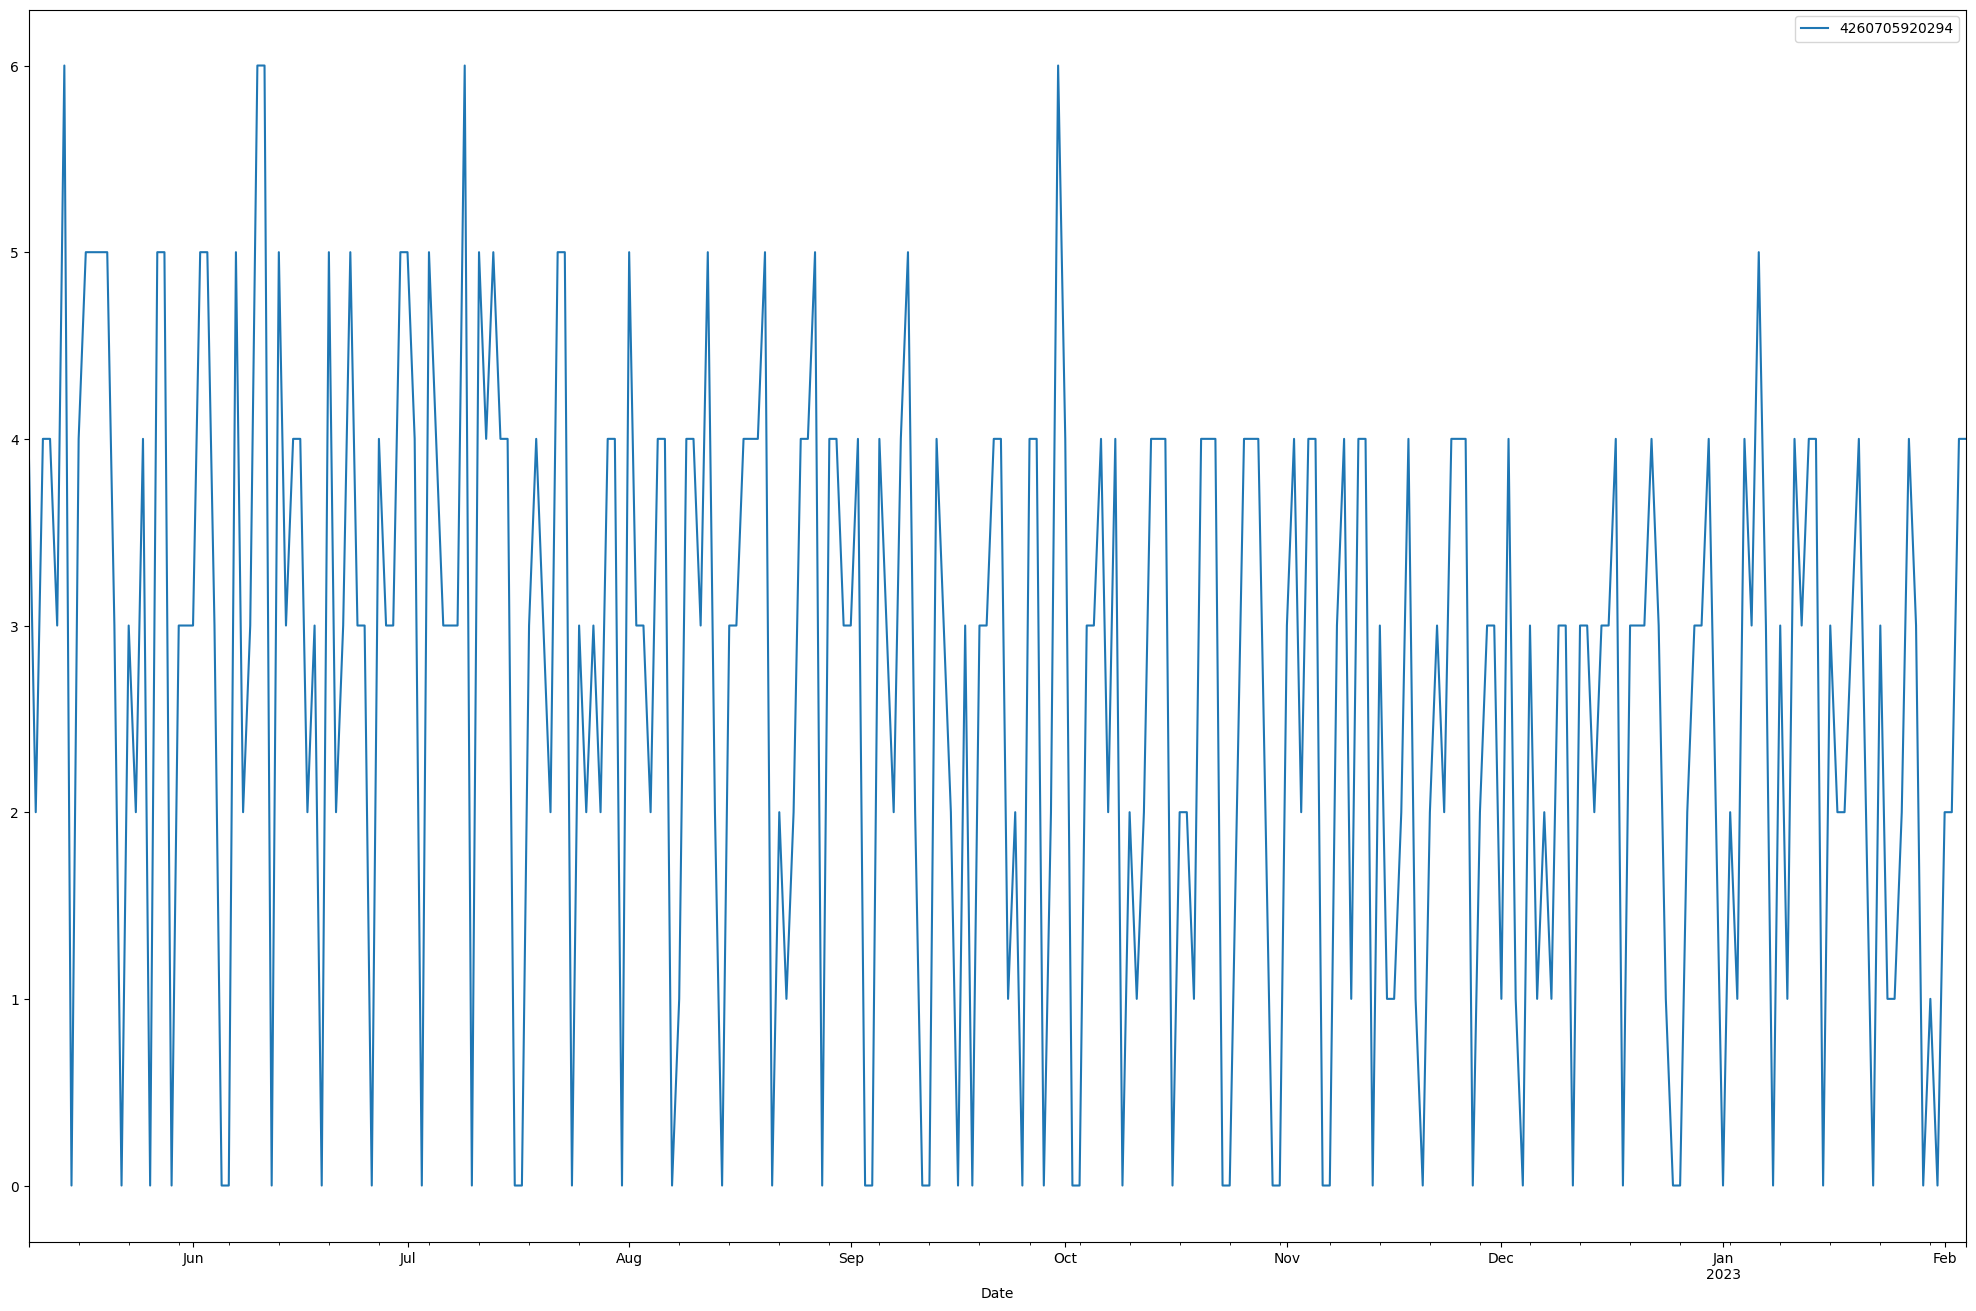

In [6]:
plot_cols = ['4260705920294']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

/var/folders/_9/8079w5qj7k35k8xs3wp9ybzc0000gn/T/ipykernel_86154/3909058166.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(6, 2, i + 1)


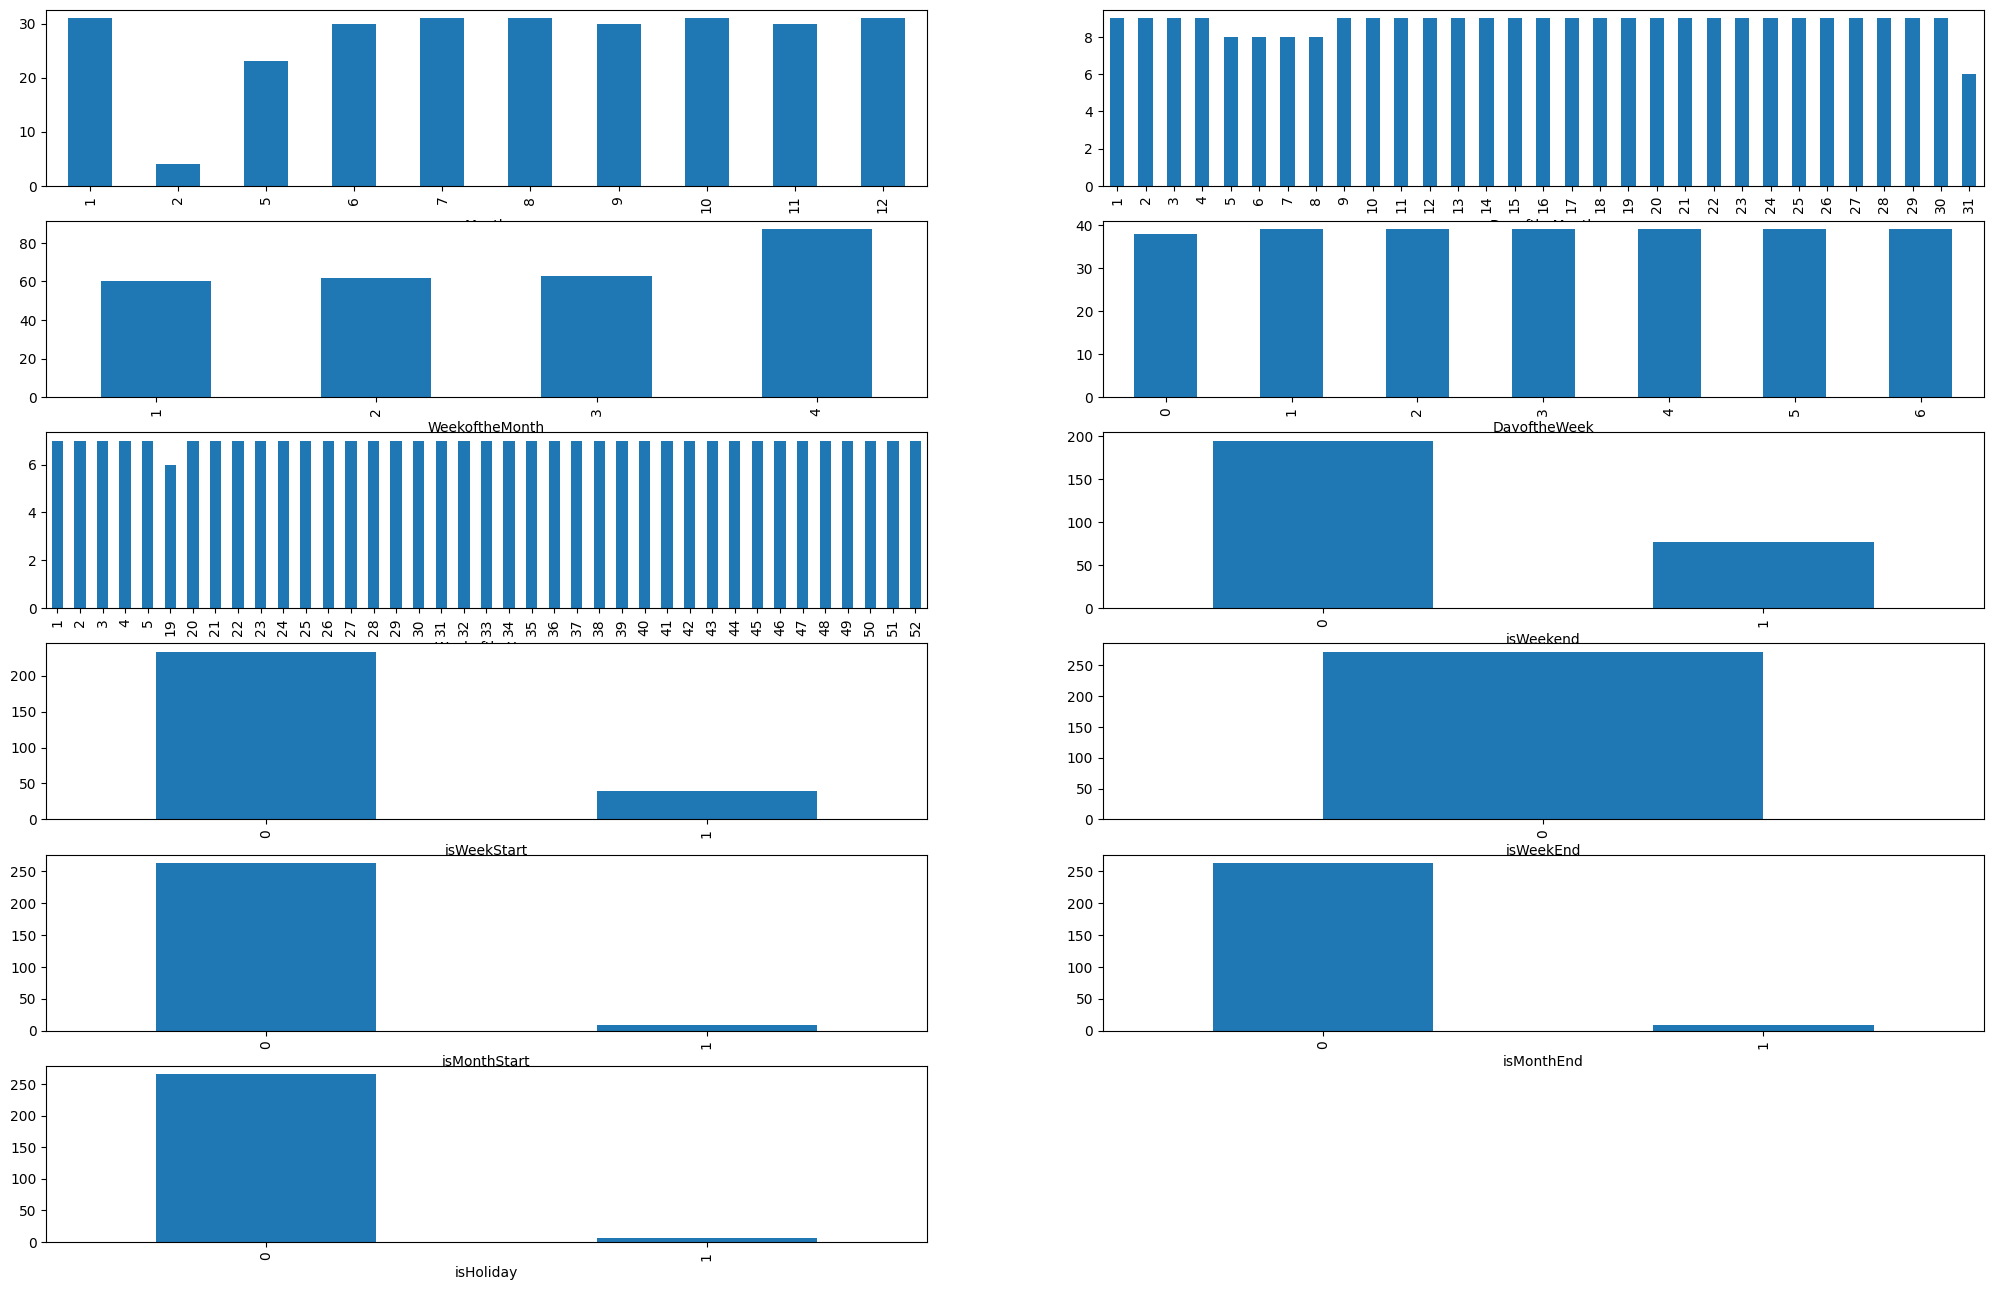

In [7]:
#features are Month	DayoftheMonth	WeekoftheMonth	DayoftheWeek	WeekoftheYear	DayoftheYear	isWeekend	isWeekStart	isWeekEnd	isMonthStart	isMonthEnd	Season	isHoliday

features = ['Month','DayoftheMonth','WeekoftheMonth','DayoftheWeek','WeekoftheYear','isWeekend','isWeekStart','isWeekEnd','isMonthStart','isMonthEnd','isHoliday']

plt.subplots(figsize=(25, 16))
for i, col in enumerate(features):
    plt.subplot(6, 2, i + 1)
    df.groupby(col).count()['4260705920294'].plot.bar()
plt.show()

<AxesSubplot: xlabel='DayoftheYear'>

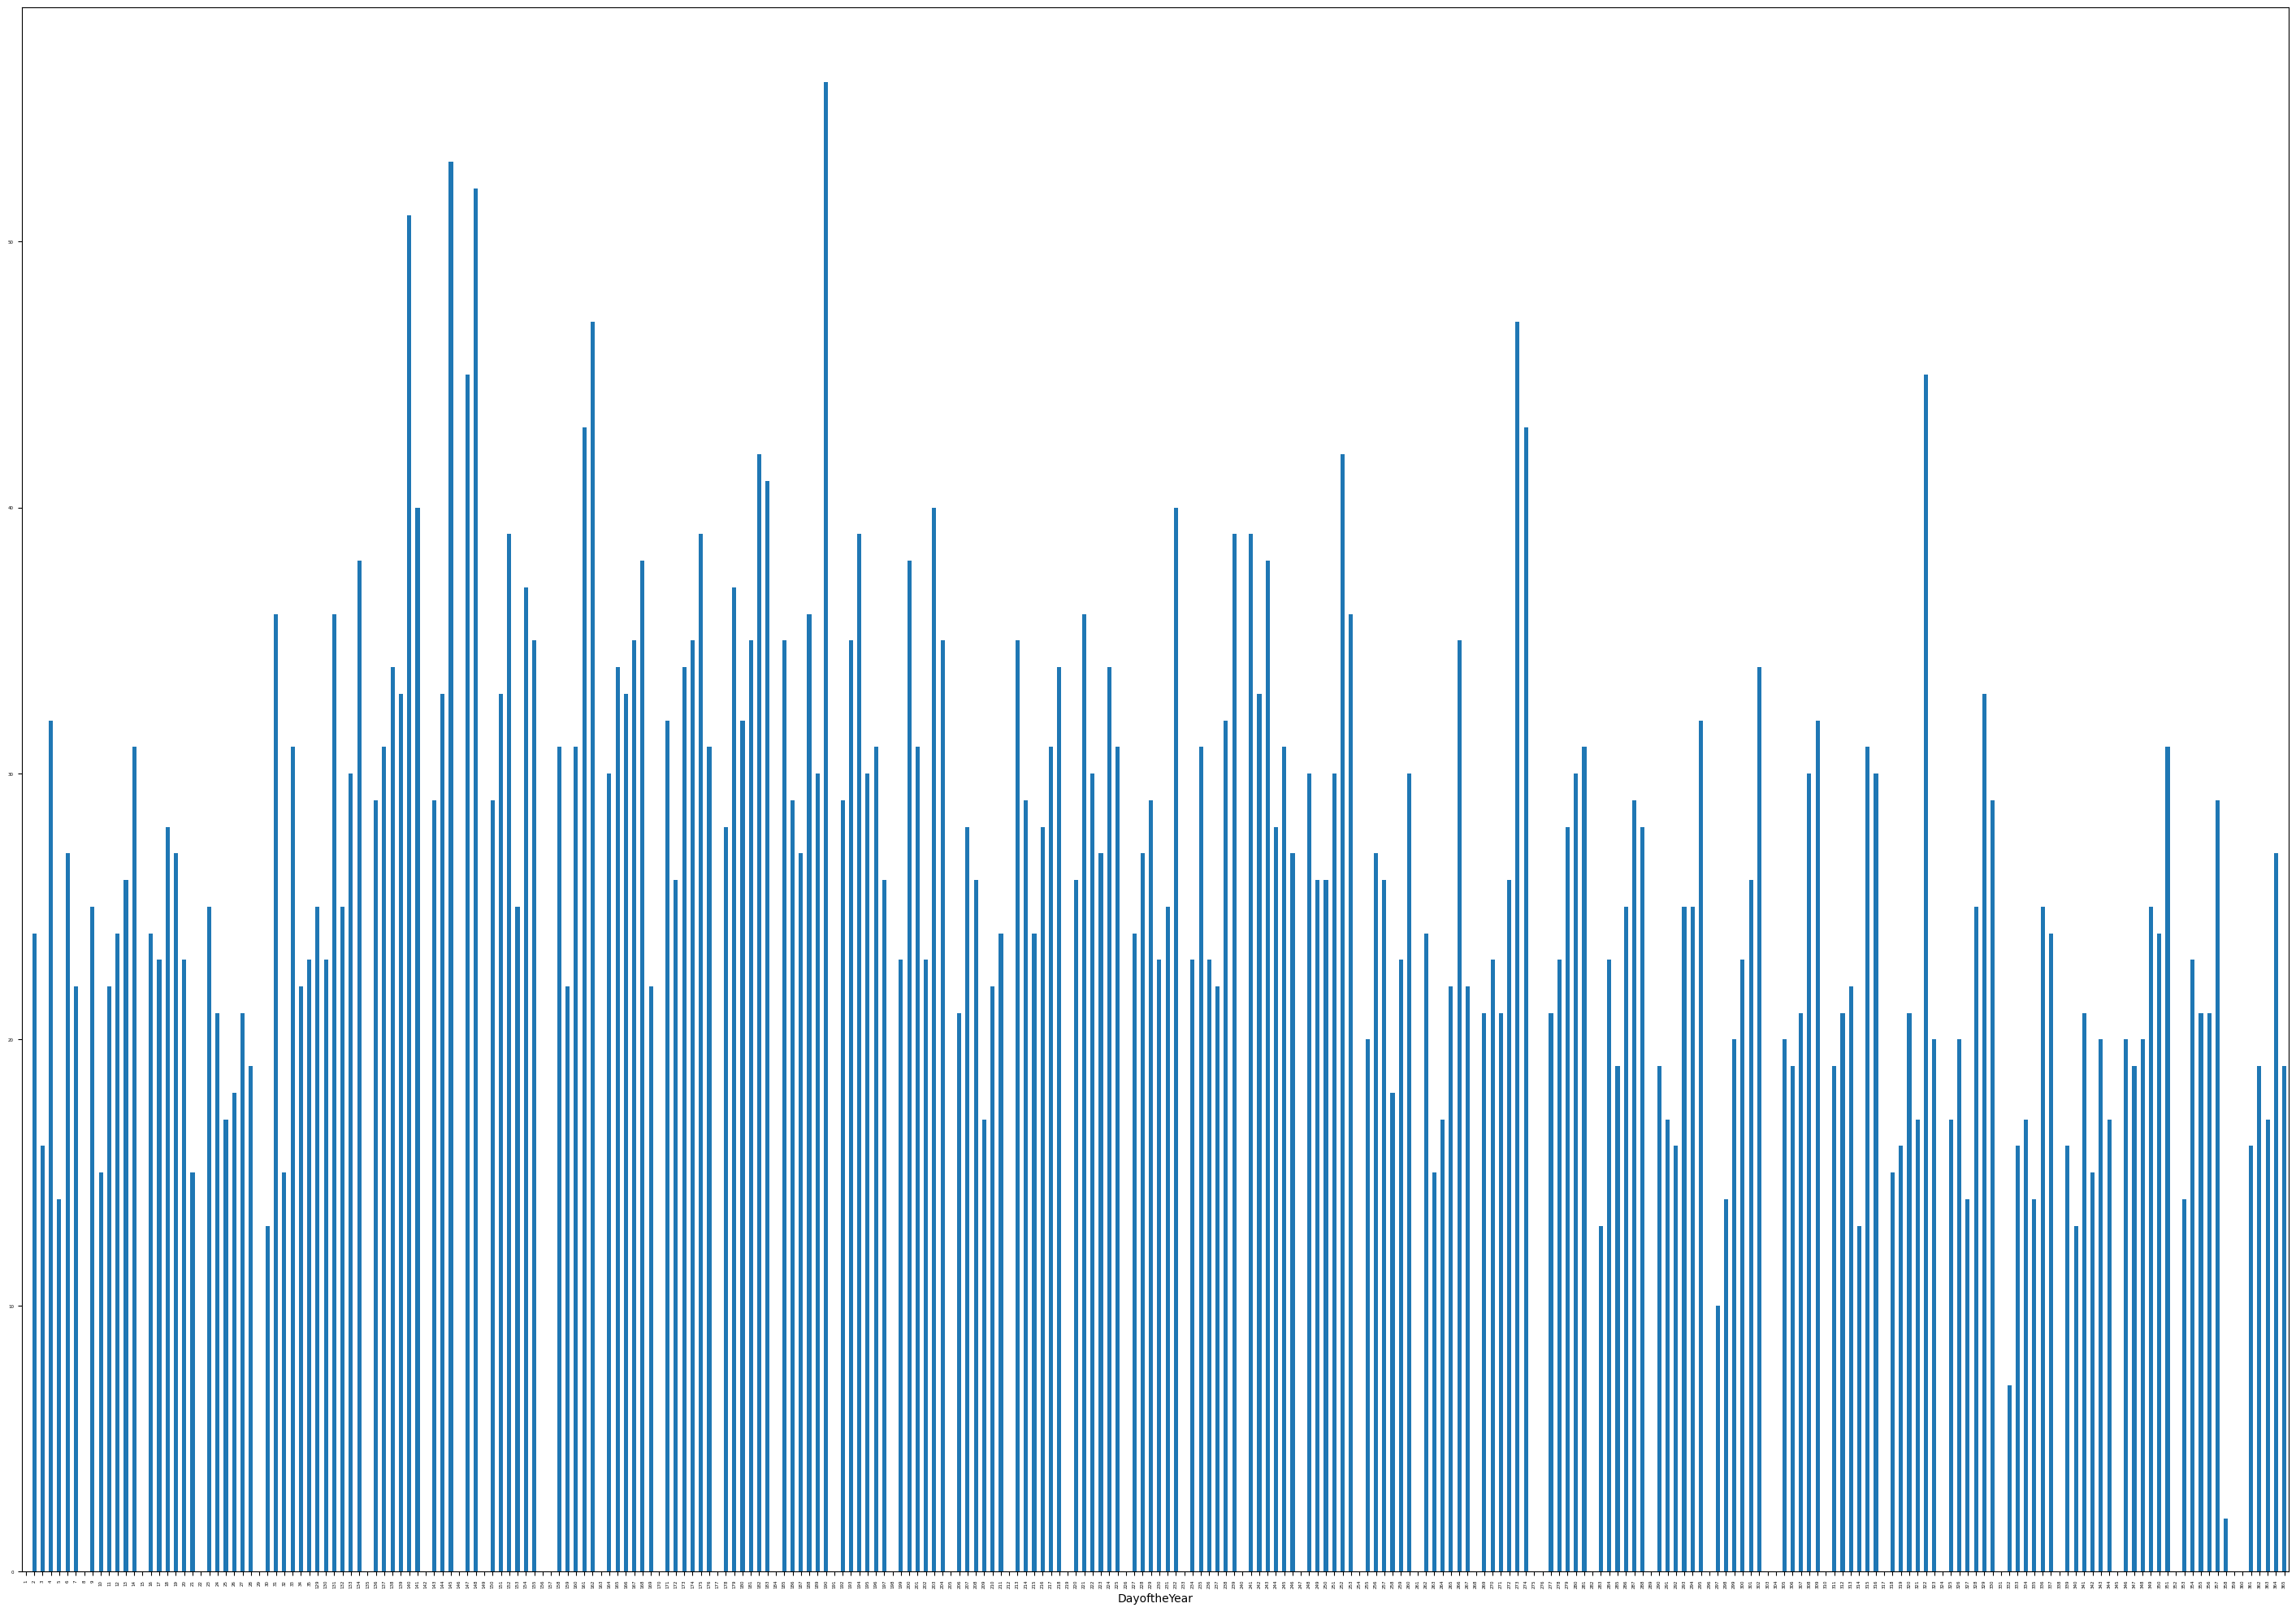

In [8]:
#groupby DayoftheYear and plot the mean of Quantity with font size 4
df.groupby('DayoftheYear').mean()['total_quantity_day'].plot.bar(figsize=(36, 25), fontsize=4)

# Fast Fourier Transform (beware of multiple values!)

In [9]:
import numpy as np


# Fourier Transform for Month
df['Month_sin'] = np.sin(2 * np.pi * df['Month']/12.0)
df['Month_cos'] = np.cos(2 * np.pi * df['Month']/12.0)

# Fourier Transform for DayoftheMonth
df['DayoftheMonth_sin'] = np.sin(2 * np.pi * df['DayoftheMonth']/31.0)
df['DayoftheMonth_cos'] = np.cos(2 * np.pi * df['DayoftheMonth']/31.0)

# Fourier Transform for WeekoftheMonth
df['WeekoftheMonth_sin'] = np.sin(2 * np.pi * df['WeekoftheMonth']/4.0)
df['WeekoftheMonth_cos'] = np.cos(2 * np.pi * df['WeekoftheMonth']/4.0)

# Fourier Transform for DayoftheWeek
df['DayoftheWeek_sin'] = np.sin(2 * np.pi * df['DayoftheWeek']/7.0)
df['DayoftheWeek_cos'] = np.cos(2 * np.pi * df['DayoftheWeek']/7.0)

# Fourier Transform for WeekoftheYear
df['WeekoftheYear_sin'] = np.sin(2 * np.pi * df['WeekoftheYear']/52.0)
df['WeekoftheYear_cos'] = np.cos(2 * np.pi * df['WeekoftheYear']/52.0)

# Fourier Transform for DayoftheYear
df['DayoftheYear_sin'] = np.sin(2 * np.pi * df['DayoftheYear']/365.0)
df['DayoftheYear_cos'] = np.cos(2 * np.pi * df['DayoftheYear']/365.0)

# Drop the original columns inplace=False
df = df.drop(['Month','DayoftheMonth','WeekoftheMonth','DayoftheWeek','WeekoftheYear','DayoftheYear'], axis=1)

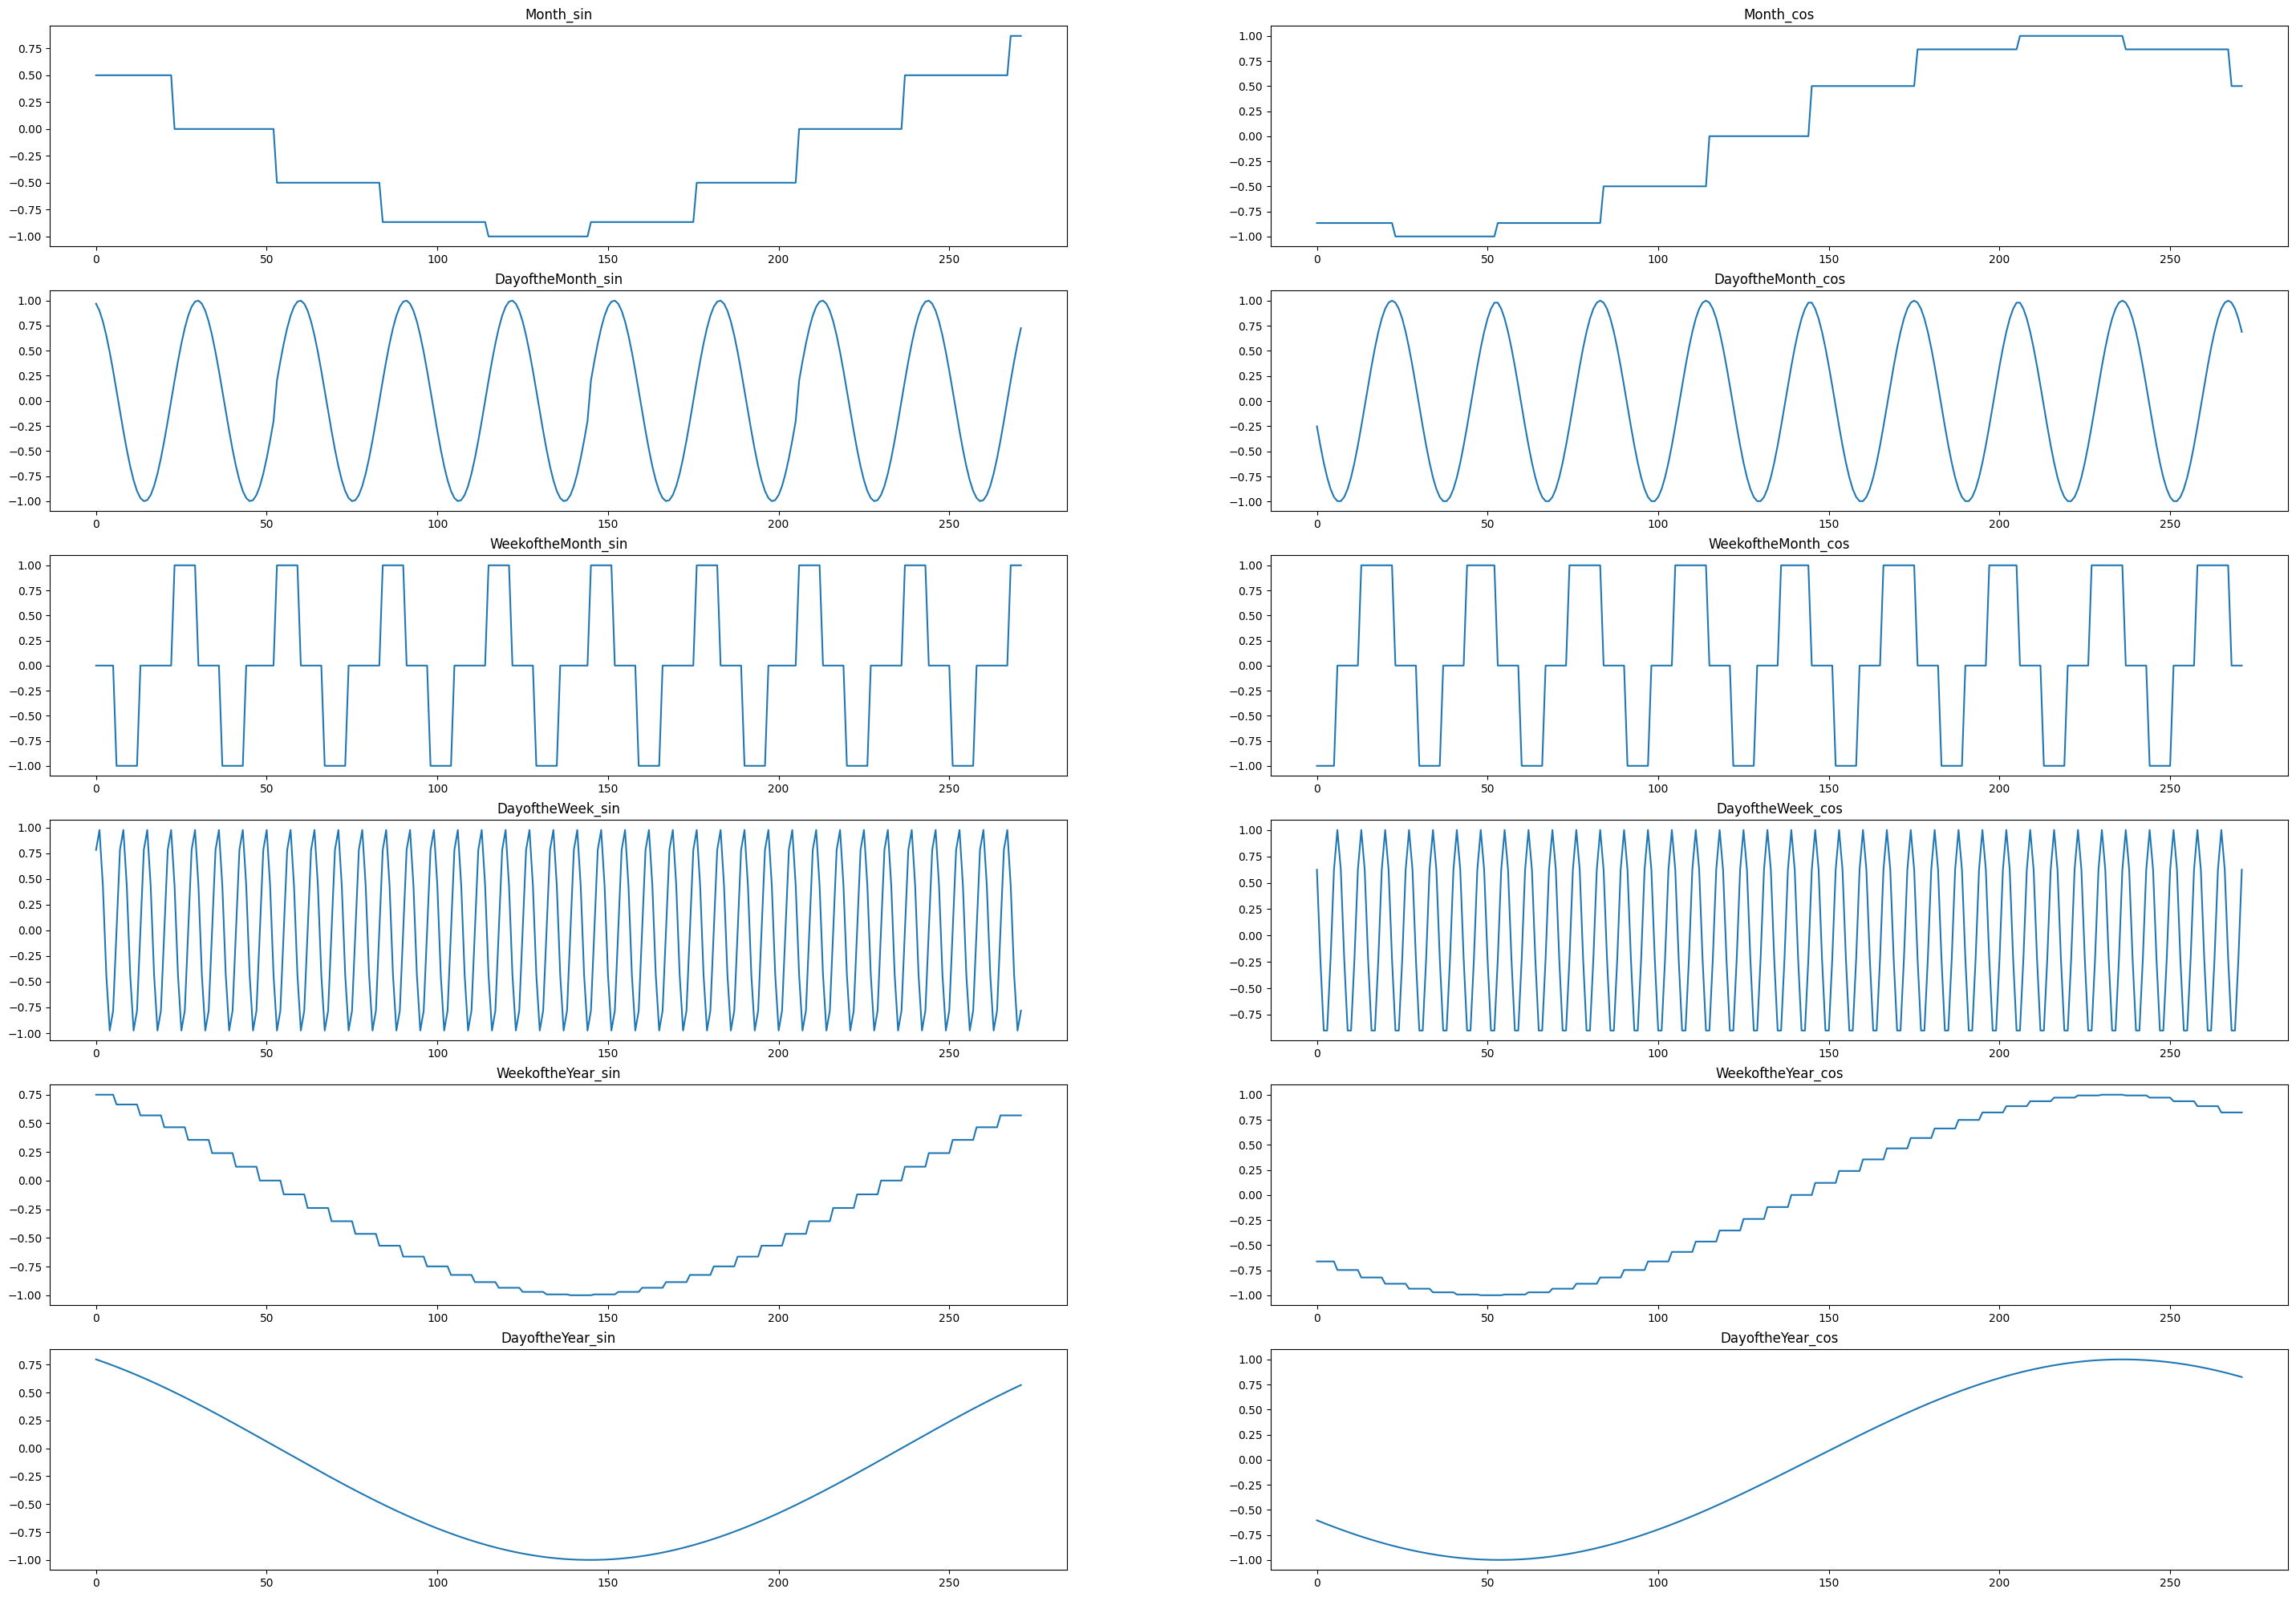

In [10]:
import matplotlib.pyplot as plt

# Plot all the above ffts in subplots and add title to each subplot (if it's cos or sin and also what feature it is)
plt.figure(figsize=(36, 25))
plt.subplot(6, 2, 1)
plt.plot(df['Month_sin'])
plt.title('Month_sin')

plt.subplot(6, 2, 2)
plt.plot(df['Month_cos'])
plt.title('Month_cos')

plt.subplot(6, 2, 3)
plt.plot(df['DayoftheMonth_sin'])
plt.title('DayoftheMonth_sin')

plt.subplot(6, 2, 4)
plt.plot(df['DayoftheMonth_cos'])
plt.title('DayoftheMonth_cos')

plt.subplot(6, 2, 5)
plt.plot(df['WeekoftheMonth_sin'])
plt.title('WeekoftheMonth_sin')

plt.subplot(6, 2, 6)
plt.plot(df['WeekoftheMonth_cos'])
plt.title('WeekoftheMonth_cos')

plt.subplot(6, 2, 7)
plt.plot(df['DayoftheWeek_sin'])
plt.title('DayoftheWeek_sin')

plt.subplot(6, 2, 8)
plt.plot(df['DayoftheWeek_cos'])
plt.title('DayoftheWeek_cos')

plt.subplot(6, 2, 9)
plt.plot(df['WeekoftheYear_sin'])
plt.title('WeekoftheYear_sin')

plt.subplot(6, 2, 10)
plt.plot(df['WeekoftheYear_cos'])
plt.title('WeekoftheYear_cos')

plt.subplot(6, 2, 11)
plt.plot(df['DayoftheYear_sin'])
plt.title('DayoftheYear_sin')

plt.subplot(6, 2, 12)
plt.plot(df['DayoftheYear_cos'])
plt.title('DayoftheYear_cos')

plt.show()

# Splitting the Data

In [11]:
#set 'StoreID','ProductID' as index
# df = df.set_index(['4260705920294'])
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

# Normalization

In [12]:
train_mean = train_df.mean()
train_std = train_df.std()
train_std = train_std.replace(0, 0.3)

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

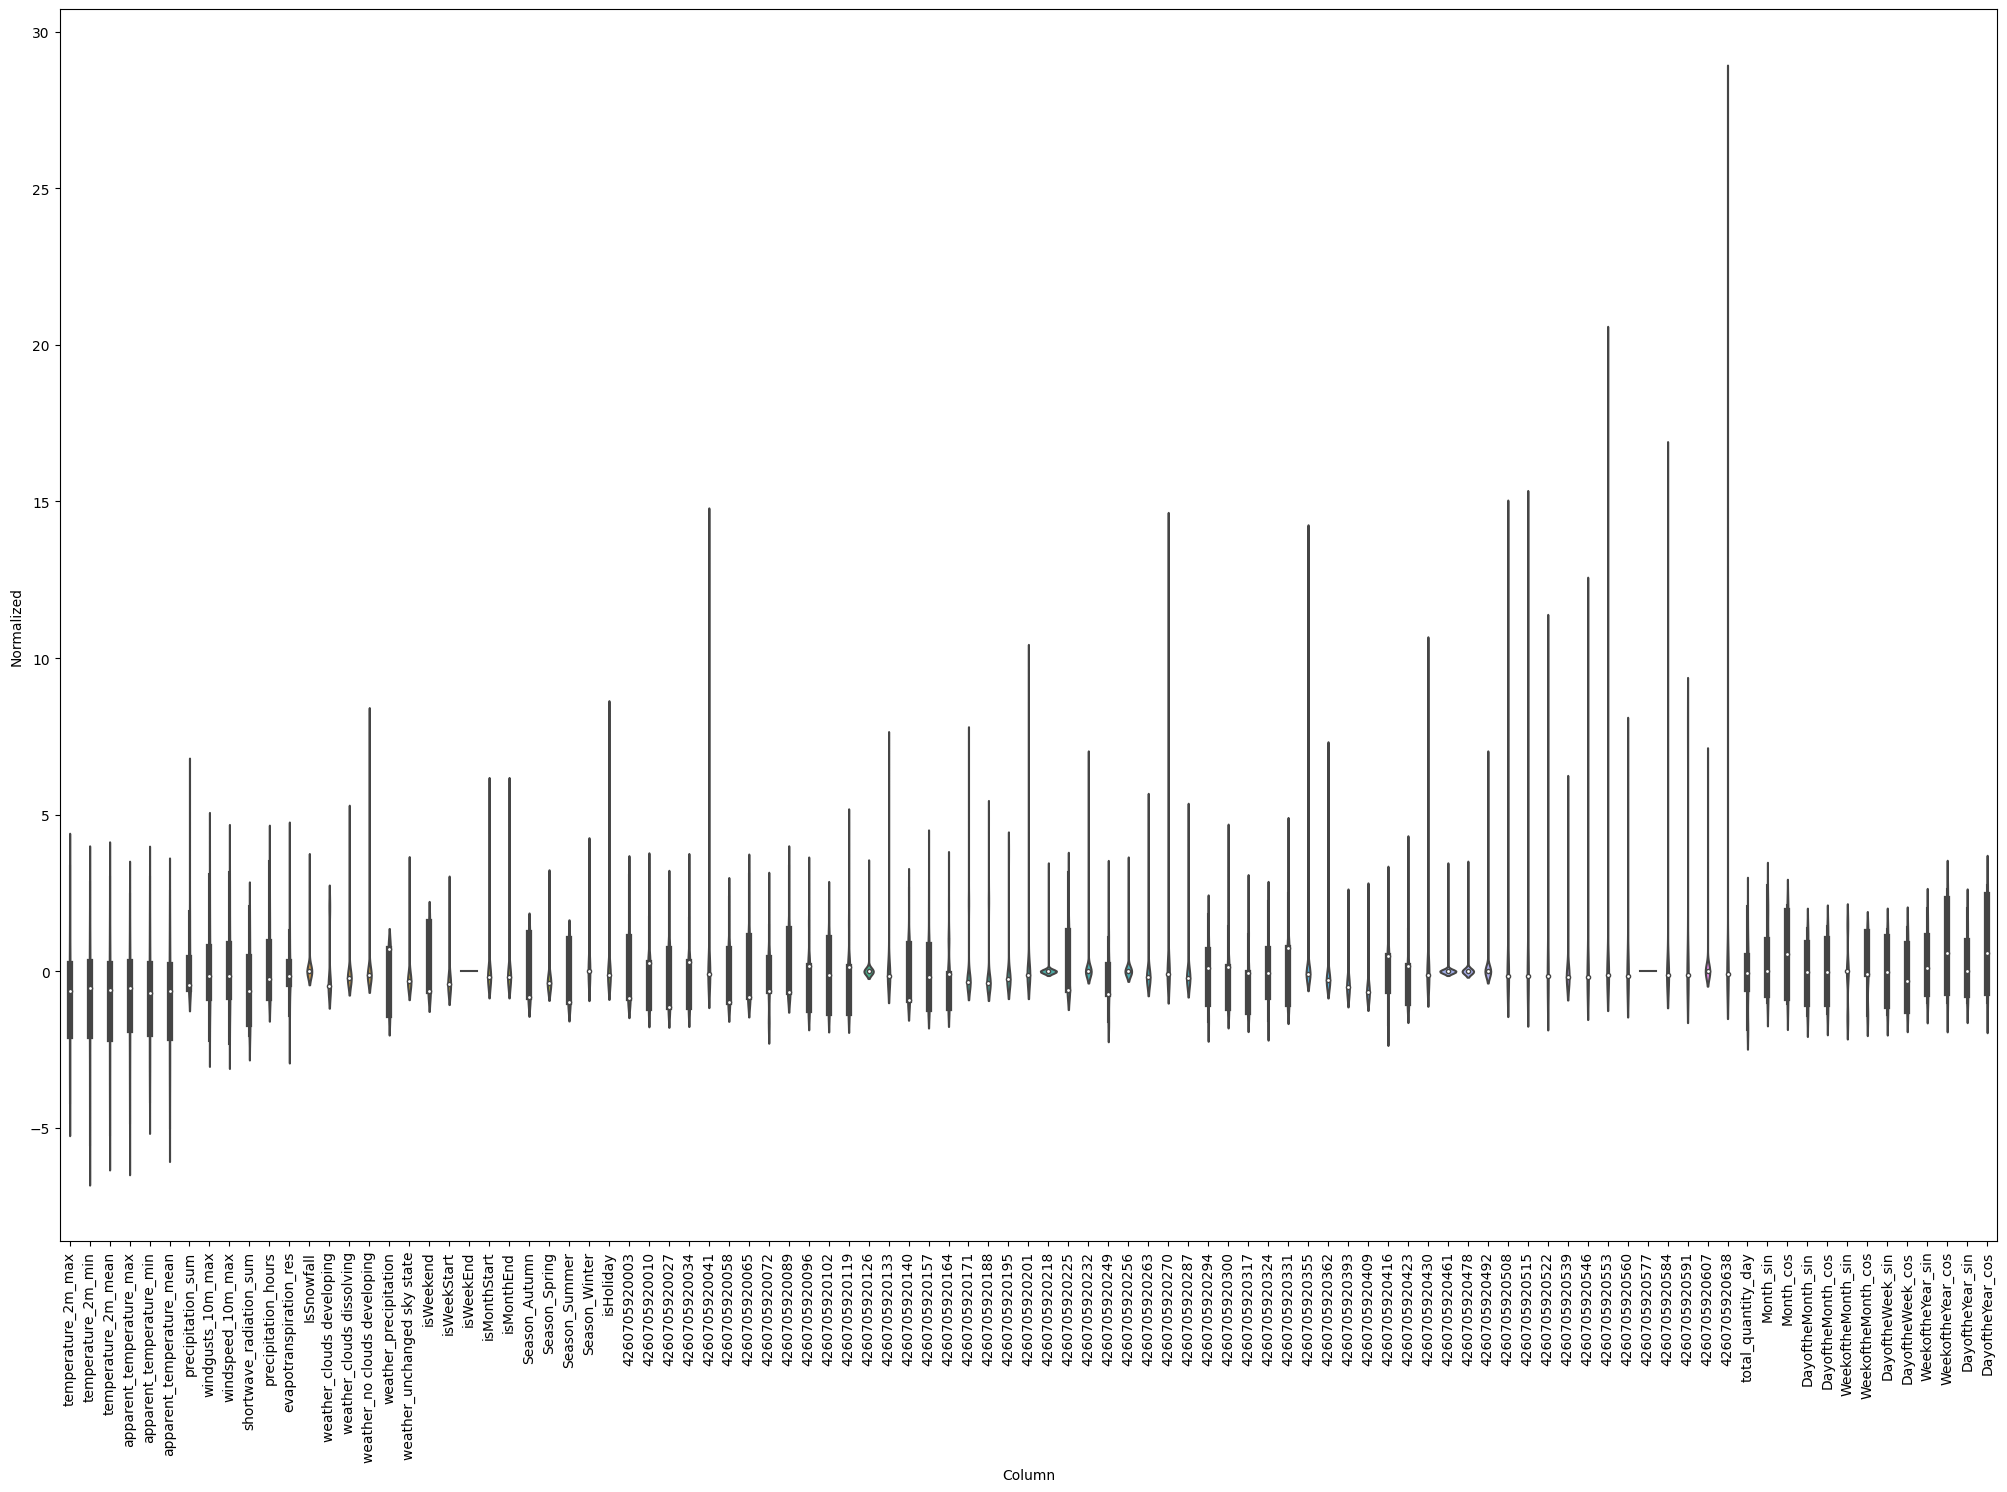

In [13]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(25, 16))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [14]:
#return number of nan rows and columns in train_df, val_df, test_df
#rows
print('train_df nan rows:',train_df.isnull().any(axis=1).sum())
print('val_df nan rows:',val_df.isnull().any(axis=1).sum())
print('test_df nan rows:',test_df.isnull().any(axis=1).sum())

#columns
print('train_df nan columns:',train_df.isnull().any(axis=0).sum())
print('val_df nan columns:',val_df.isnull().any(axis=0).sum())
print('test_df nan columns:',test_df.isnull().any(axis=0).sum())



train_df nan rows: 0
val_df nan rows: 0
test_df nan rows: 0
train_df nan columns: 0
val_df nan columns: 0
test_df nan columns: 0


# Data Windowing & Splitting

In [15]:
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])


In [16]:
w = WindowGenerator(input_width=6, label_width=1, shift=1, label_columns=['4260705920294'])
w

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['4260705920294']

In [17]:
def split_window(self, features):
  inputs = features[:, self.input_slice, :]
  labels = features[:, self.labels_slice, :]
  if self.label_columns is not None:
    labels = tf.stack(
        [labels[:, :, self.column_indices[name]] for name in self.label_columns],
        axis=-1)

  # Slicing doesn't preserve static shape information, so set the shapes
  # manually. This way the `tf.data.Datasets` are easier to inspect.
  inputs.set_shape([None, self.input_width, None])
  labels.set_shape([None, self.label_width, None])

  return inputs, labels

WindowGenerator.split_window = split_window

In [18]:
# Stack three slices, the length of the total window.
example_window = tf.stack([np.array(train_df[:w.total_window_size]),
                           np.array(train_df[50:50+w.total_window_size]),
                           np.array(train_df[100:100+w.total_window_size])])

example_inputs, example_labels = w.split_window(example_window)

print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'Labels shape: {example_labels.shape}')


All shapes are: (batch, time, features)
Window shape: (3, 7, 97)
Inputs shape: (3, 6, 97)
Labels shape: (3, 1, 1)


2023-06-21 19:57:17.831927: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


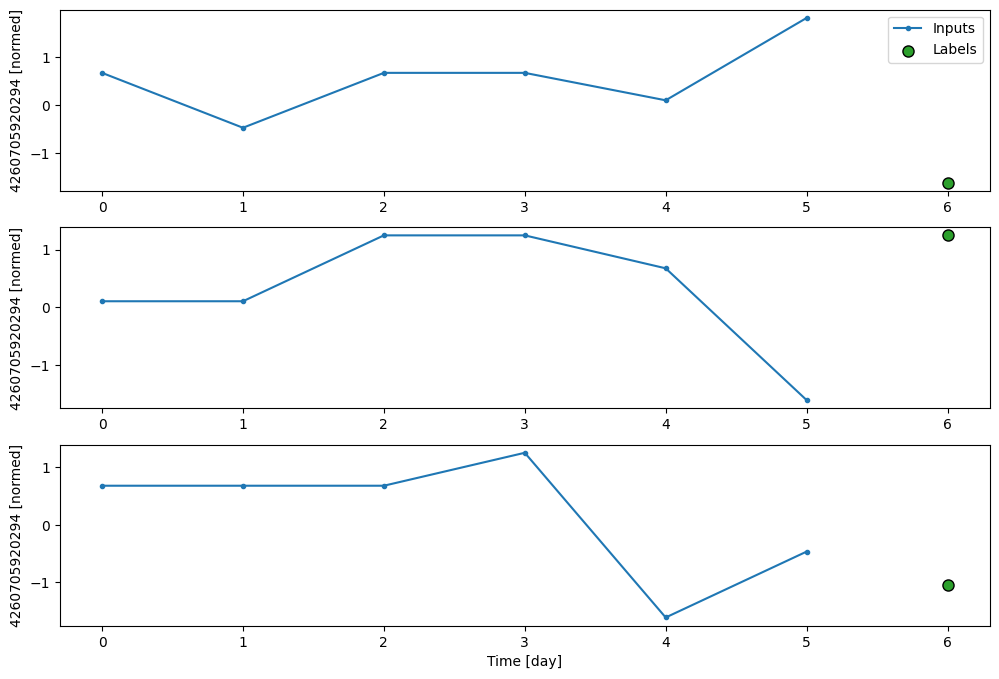

In [19]:
w.example = example_inputs, example_labels

def plot(self, model=None, plot_col='4260705920294', max_subplots=3):
  inputs, labels = self.example
  plt.figure(figsize=(12, 8))
  plot_col_index = self.column_indices[plot_col]
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'{plot_col} [normed]')
    plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

    if self.label_columns:
      label_col_index = self.label_columns_indices.get(plot_col, None)
    else:
      label_col_index = plot_col_index

    if label_col_index is None:
      continue

    plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      predictions = model(inputs)
      plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [day]')

WindowGenerator.plot = plot

w.plot()

# Create tensorflow dataset

In [20]:
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.utils.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=32,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset

In [21]:
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [22]:
w.train.element_spec

(TensorSpec(shape=(None, 6, 97), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 1, 1), dtype=tf.float32, name=None))

In [23]:
for example_inputs, example_labels in w.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 6, 97)
Labels shape (batch, time, features): (32, 1, 1)


In [24]:
train_df.columns

Index(['temperature_2m_max', 'temperature_2m_min', 'temperature_2m_mean',
       'apparent_temperature_max', 'apparent_temperature_min',
       'apparent_temperature_mean', 'precipitation_sum', 'windgusts_10m_max',
       'windspeed_10m_max', 'shortwave_radiation_sum', 'precipitation_hours',
       'evapotranspiration_res', 'IsSnowfall', 'weather_clouds developing',
       'weather_clouds dissolving', 'weather_no clouds developing',
       'weather_precipitation', 'weather_unchanged sky state', 'isWeekend',
       'isWeekStart', 'isWeekEnd', 'isMonthStart', 'isMonthEnd',
       'Season_Autumn', 'Season_Spring', 'Season_Summer', 'Season_Winter',
       'isHoliday', '4260705920003', '4260705920010', '4260705920027',
       '4260705920034', '4260705920041', '4260705920058', '4260705920065',
       '4260705920072', '4260705920089', '4260705920096', '4260705920102',
       '4260705920119', '4260705920126', '4260705920133', '4260705920140',
       '4260705920157', '4260705920164', '426070592

# Single Step Models

In [25]:
single_step_window = WindowGenerator(
    input_width=21, label_width=21, shift=1,
    label_columns=['4260705920294'])
single_step_window

Total window size: 22
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Label indices: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Label column name(s): ['4260705920294']

In [26]:
for example_inputs, example_labels in single_step_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 21, 97)
Labels shape (batch, time, features): (32, 21, 1)


## Baseline

In [27]:
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]


In [28]:
baseline = Baseline(label_index=column_indices['4260705920294'])

baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(single_step_window.val)
performance['Baseline'] = baseline.evaluate(single_step_window.test, verbose=0)


2/2 [==============================] - 0s 6ms/step - loss: 1.1540 - mean_absolute_error: 0.8429


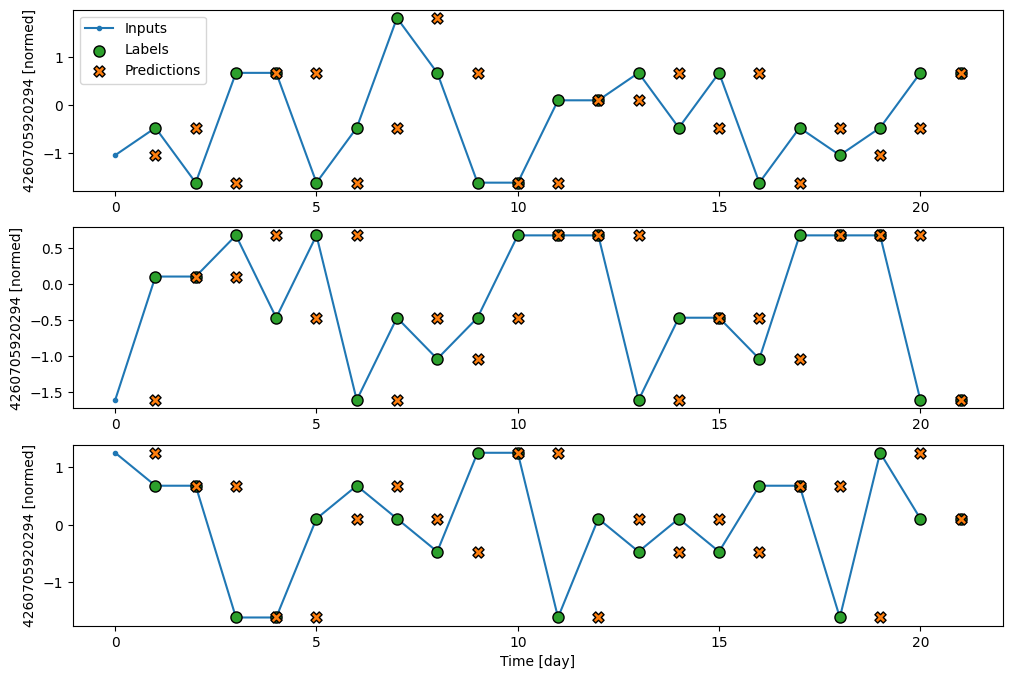

In [29]:
single_step_window.plot(baseline)


## Linear Model

In [30]:
linear = tf.keras.Sequential([
    tf.keras.layers.Dense(units=2)
])

In [31]:
MAX_EPOCHS = 50

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [32]:
history = compile_and_fit(linear, single_step_window)

val_performance['Linear'] = linear.evaluate(single_step_window.val)
performance['Linear'] = linear.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
6/6 [==============================] - 1s 30ms/step - loss: 2.4465 - mean_absolute_error: 1.2210 - val_loss: 4.0711 - val_mean_absolute_error: 1.6140
Epoch 2/50
6/6 [==============================] - 0s 9ms/step - loss: 2.2030 - mean_absolute_error: 1.1593 - val_loss: 3.6195 - val_mean_absolute_error: 1.5098
Epoch 3/50
6/6 [==============================] - 0s 9ms/step - loss: 2.0038 - mean_absolute_error: 1.1085 - val_loss: 3.2941 - val_mean_absolute_error: 1.4319
Epoch 4/50
6/6 [==============================] - 0s 10ms/step - loss: 1.8384 - mean_absolute_error: 1.0661 - val_loss: 3.0526 - val_mean_absolute_error: 1.3876
Epoch 5/50
6/6 [==============================] - 0s 10ms/step - loss: 1.7019 - mean_absolute_error: 1.0302 - val_loss: 2.8848 - val_mean_absolute_error: 1.3585
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 1.5896 - mean_absolute_error: 0.9981 - val_loss: 2.7737 - val_mean_absolute_error: 1.3355
Epoch 7/50
6/6 [====================

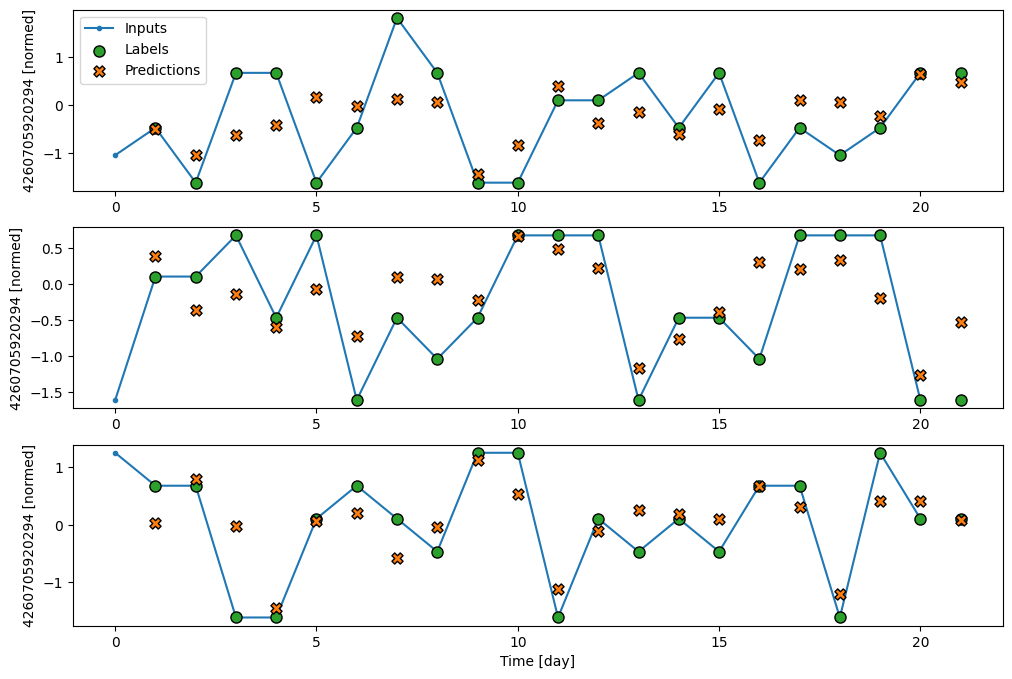

In [33]:
single_step_window.plot(linear)

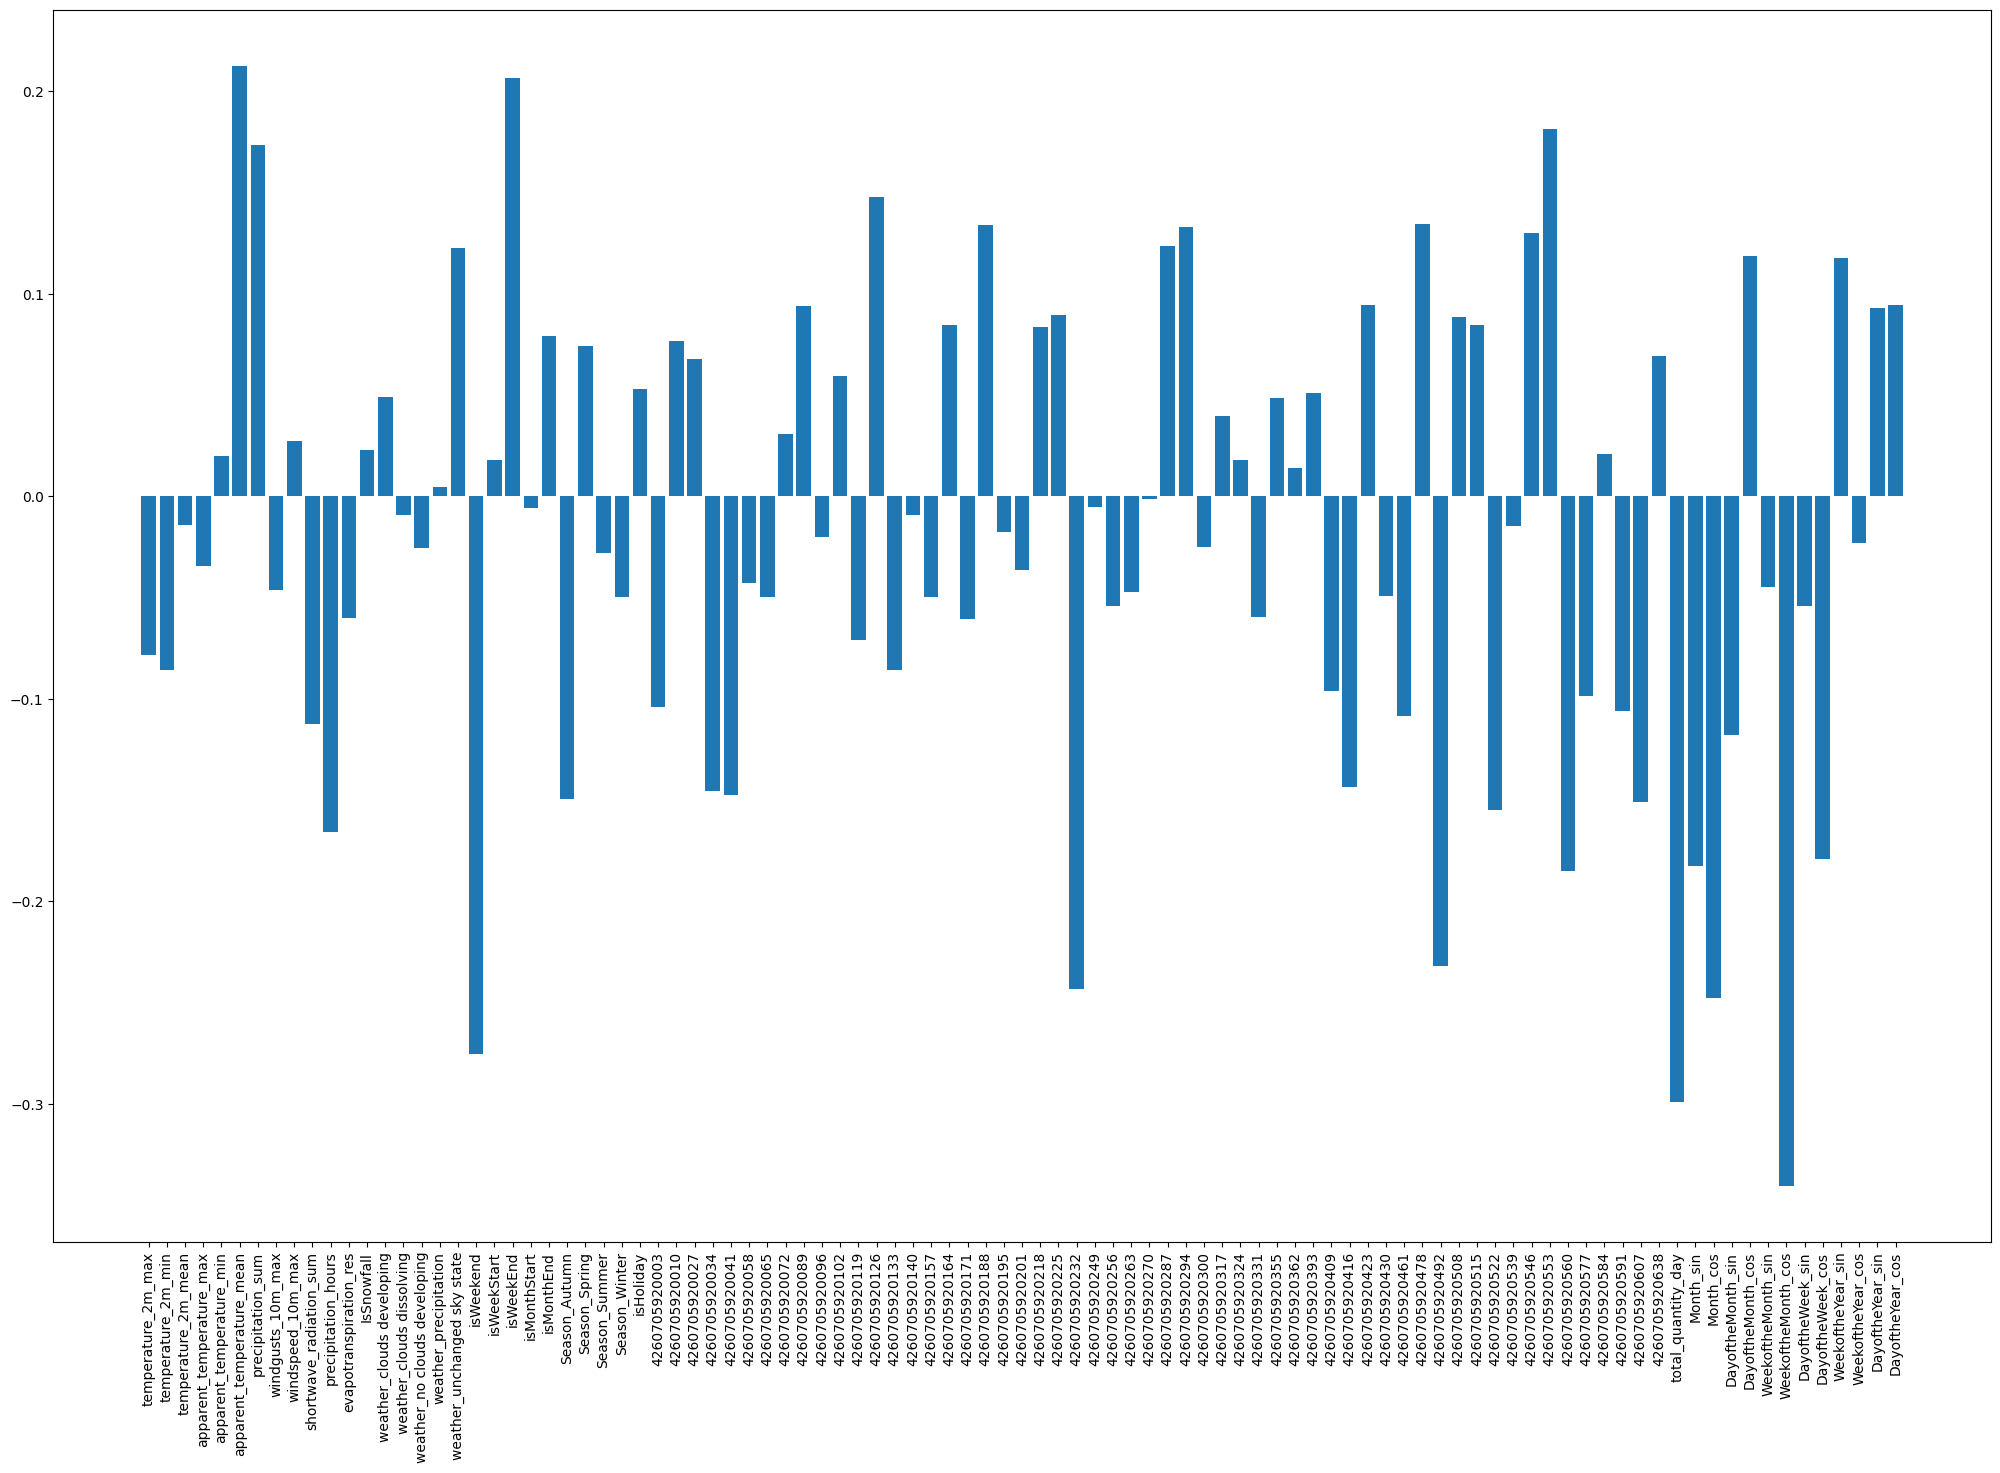

In [34]:
plt.bar(x = range(len(train_df.columns)),
        height=linear.layers[0].kernel[:,0].numpy())
axis = plt.gca()
axis.set_xticks(range(len(train_df.columns)))
_ = axis.set_xticklabels(train_df.columns, rotation=90)

## Dense Model

In [35]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(dense, single_step_window)

val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)

Epoch 1/50
6/6 [==============================] - 1s 40ms/step - loss: 1.0862 - mean_absolute_error: 0.8837 - val_loss: 1.6910 - val_mean_absolute_error: 1.0970
Epoch 2/50
6/6 [==============================] - 0s 10ms/step - loss: 0.6684 - mean_absolute_error: 0.6672 - val_loss: 1.2266 - val_mean_absolute_error: 0.9488
Epoch 3/50
6/6 [==============================] - 0s 11ms/step - loss: 0.4755 - mean_absolute_error: 0.5390 - val_loss: 0.9924 - val_mean_absolute_error: 0.8369
Epoch 4/50
6/6 [==============================] - 0s 11ms/step - loss: 0.3629 - mean_absolute_error: 0.4608 - val_loss: 0.9105 - val_mean_absolute_error: 0.7974
Epoch 5/50
6/6 [==============================] - 0s 11ms/step - loss: 0.2818 - mean_absolute_error: 0.3956 - val_loss: 0.8987 - val_mean_absolute_error: 0.8020
Epoch 6/50
6/6 [==============================] - 0s 10ms/step - loss: 0.2182 - mean_absolute_error: 0.3420 - val_loss: 0.8825 - val_mean_absolute_error: 0.7965
Epoch 7/50
6/6 [==================

In [36]:
CONV_WIDTH = 3
conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
    label_columns=['4260705920294'])

conv_window

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['4260705920294']

Text(0.5, 1.0, 'Given 6 days of inputs, predict 1 day into the future.')

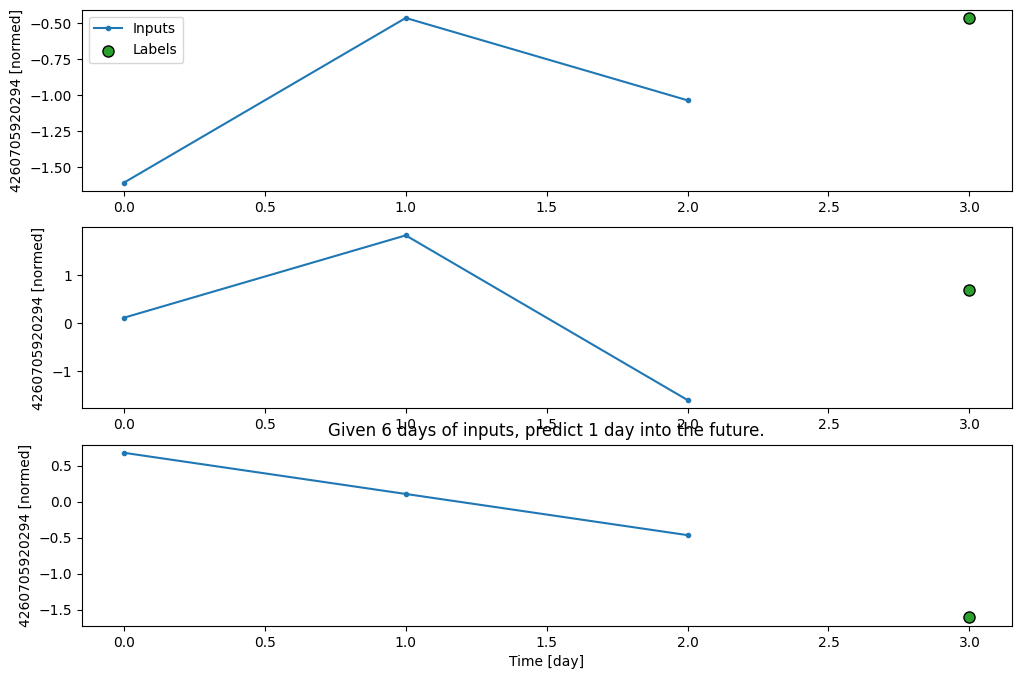

In [37]:
conv_window.plot()
plt.title("Given 6 days of inputs, predict 1 day into the future.")

In [38]:
multi_step_dense = tf.keras.Sequential([
    # Shape: (time, features) => (time*features)
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
    # Add back the time dimension.
    # Shape: (outputs) => (1, outputs)
    tf.keras.layers.Reshape([1, -1]),
])

In [39]:
history = compile_and_fit(multi_step_dense, conv_window)

IPython.display.clear_output()
val_performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.val)
performance['Multi step dense'] = multi_step_dense.evaluate(conv_window.test, verbose=0)

2/2 [==============================] - 0s 3ms/step - loss: 1.2129 - mean_absolute_error: 0.7719


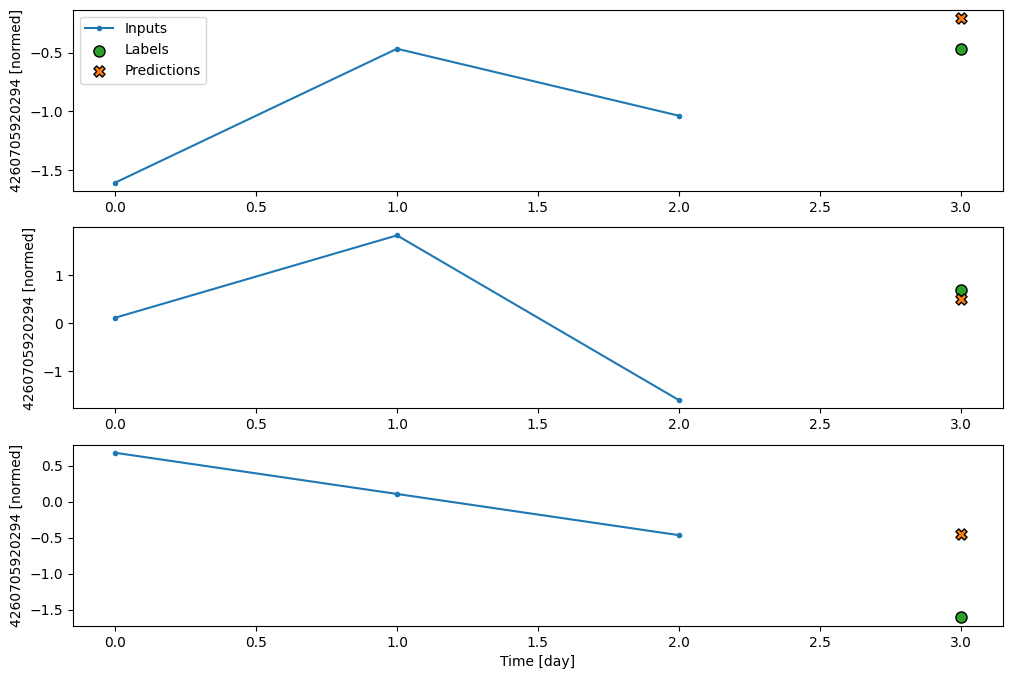

In [40]:
conv_window.plot(multi_step_dense)


## Convolutional

In [41]:
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1),
])

In [42]:
print("Conv model on `conv_window`")
print('Input shape:', conv_window.example[0].shape)
print('Output shape:', conv_model(conv_window.example[0]).shape)


Conv model on `conv_window`
Input shape: (32, 3, 97)
Output shape: (32, 1, 1)


In [43]:
history = compile_and_fit(conv_model, conv_window)

IPython.display.clear_output()
val_performance['Conv'] = conv_model.evaluate(conv_window.val)
performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

2/2 [==============================] - 0s 3ms/step - loss: 1.9975 - mean_absolute_error: 1.0445


In [44]:
print("Wide window")
print('Input shape:', single_step_window.example[0].shape)
print('Labels shape:', single_step_window.example[1].shape)
print('Output shape:', conv_model(single_step_window.example[0]).shape)

Wide window
Input shape: (32, 21, 97)
Labels shape: (32, 21, 1)
Output shape: (32, 19, 1)


In [45]:
LABEL_WIDTH = 6
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    label_columns=['4260705920294'])

wide_conv_window

Total window size: 9
Input indices: [0 1 2 3 4 5 6 7]
Label indices: [3 4 5 6 7 8]
Label column name(s): ['4260705920294']

In [46]:
print("Wide conv window")
print('Input shape:', wide_conv_window.example[0].shape)
print('Labels shape:', wide_conv_window.example[1].shape)
print('Output shape:', conv_model(wide_conv_window.example[0]).shape)

Wide conv window
Input shape: (32, 8, 97)
Labels shape: (32, 6, 1)
Output shape: (32, 6, 1)


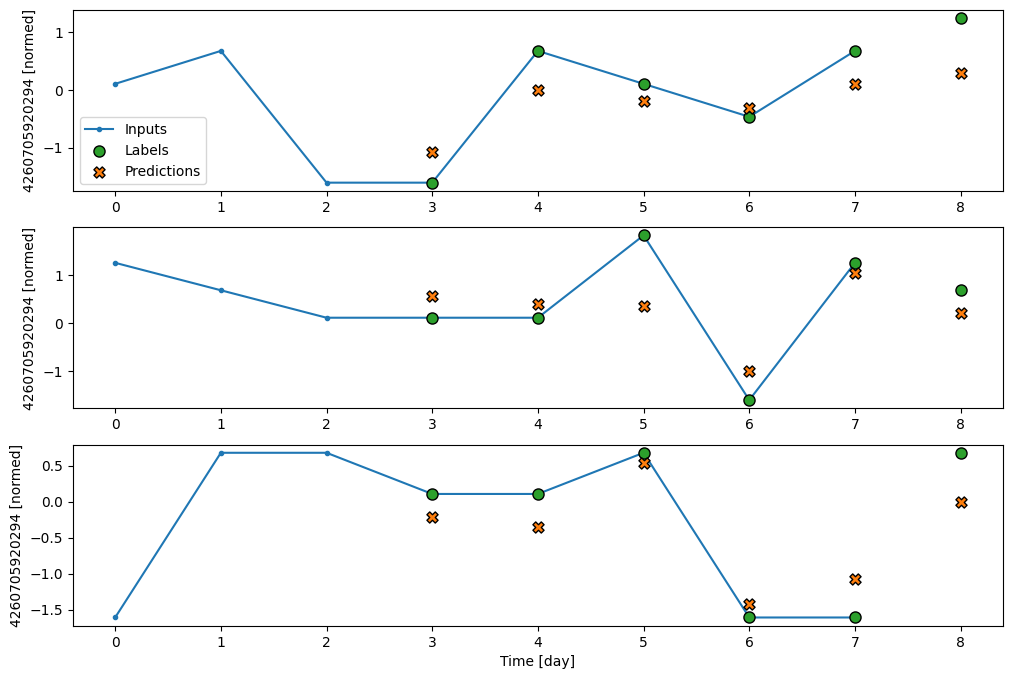

In [47]:
wide_conv_window.plot(conv_model)

## RNN

In [48]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

In [49]:
print('Input shape:', single_step_window.example[0].shape)
print('Output shape:', lstm_model(single_step_window.example[0]).shape)


Input shape: (32, 21, 97)
Output shape: (32, 21, 1)


In [50]:
history = compile_and_fit(lstm_model, single_step_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(single_step_window.val)
performance['LSTM'] = lstm_model.evaluate(single_step_window.test, verbose=0)

2/2 [==============================] - 0s 6ms/step - loss: 0.7524 - mean_absolute_error: 0.7100


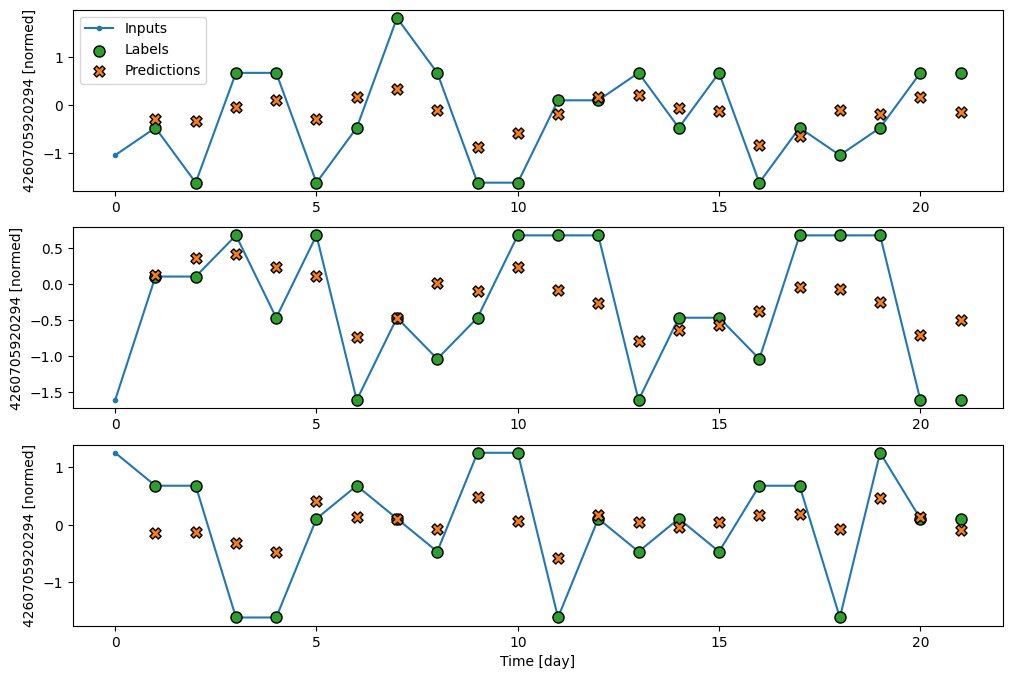

In [51]:
single_step_window.plot(lstm_model)

## Performance

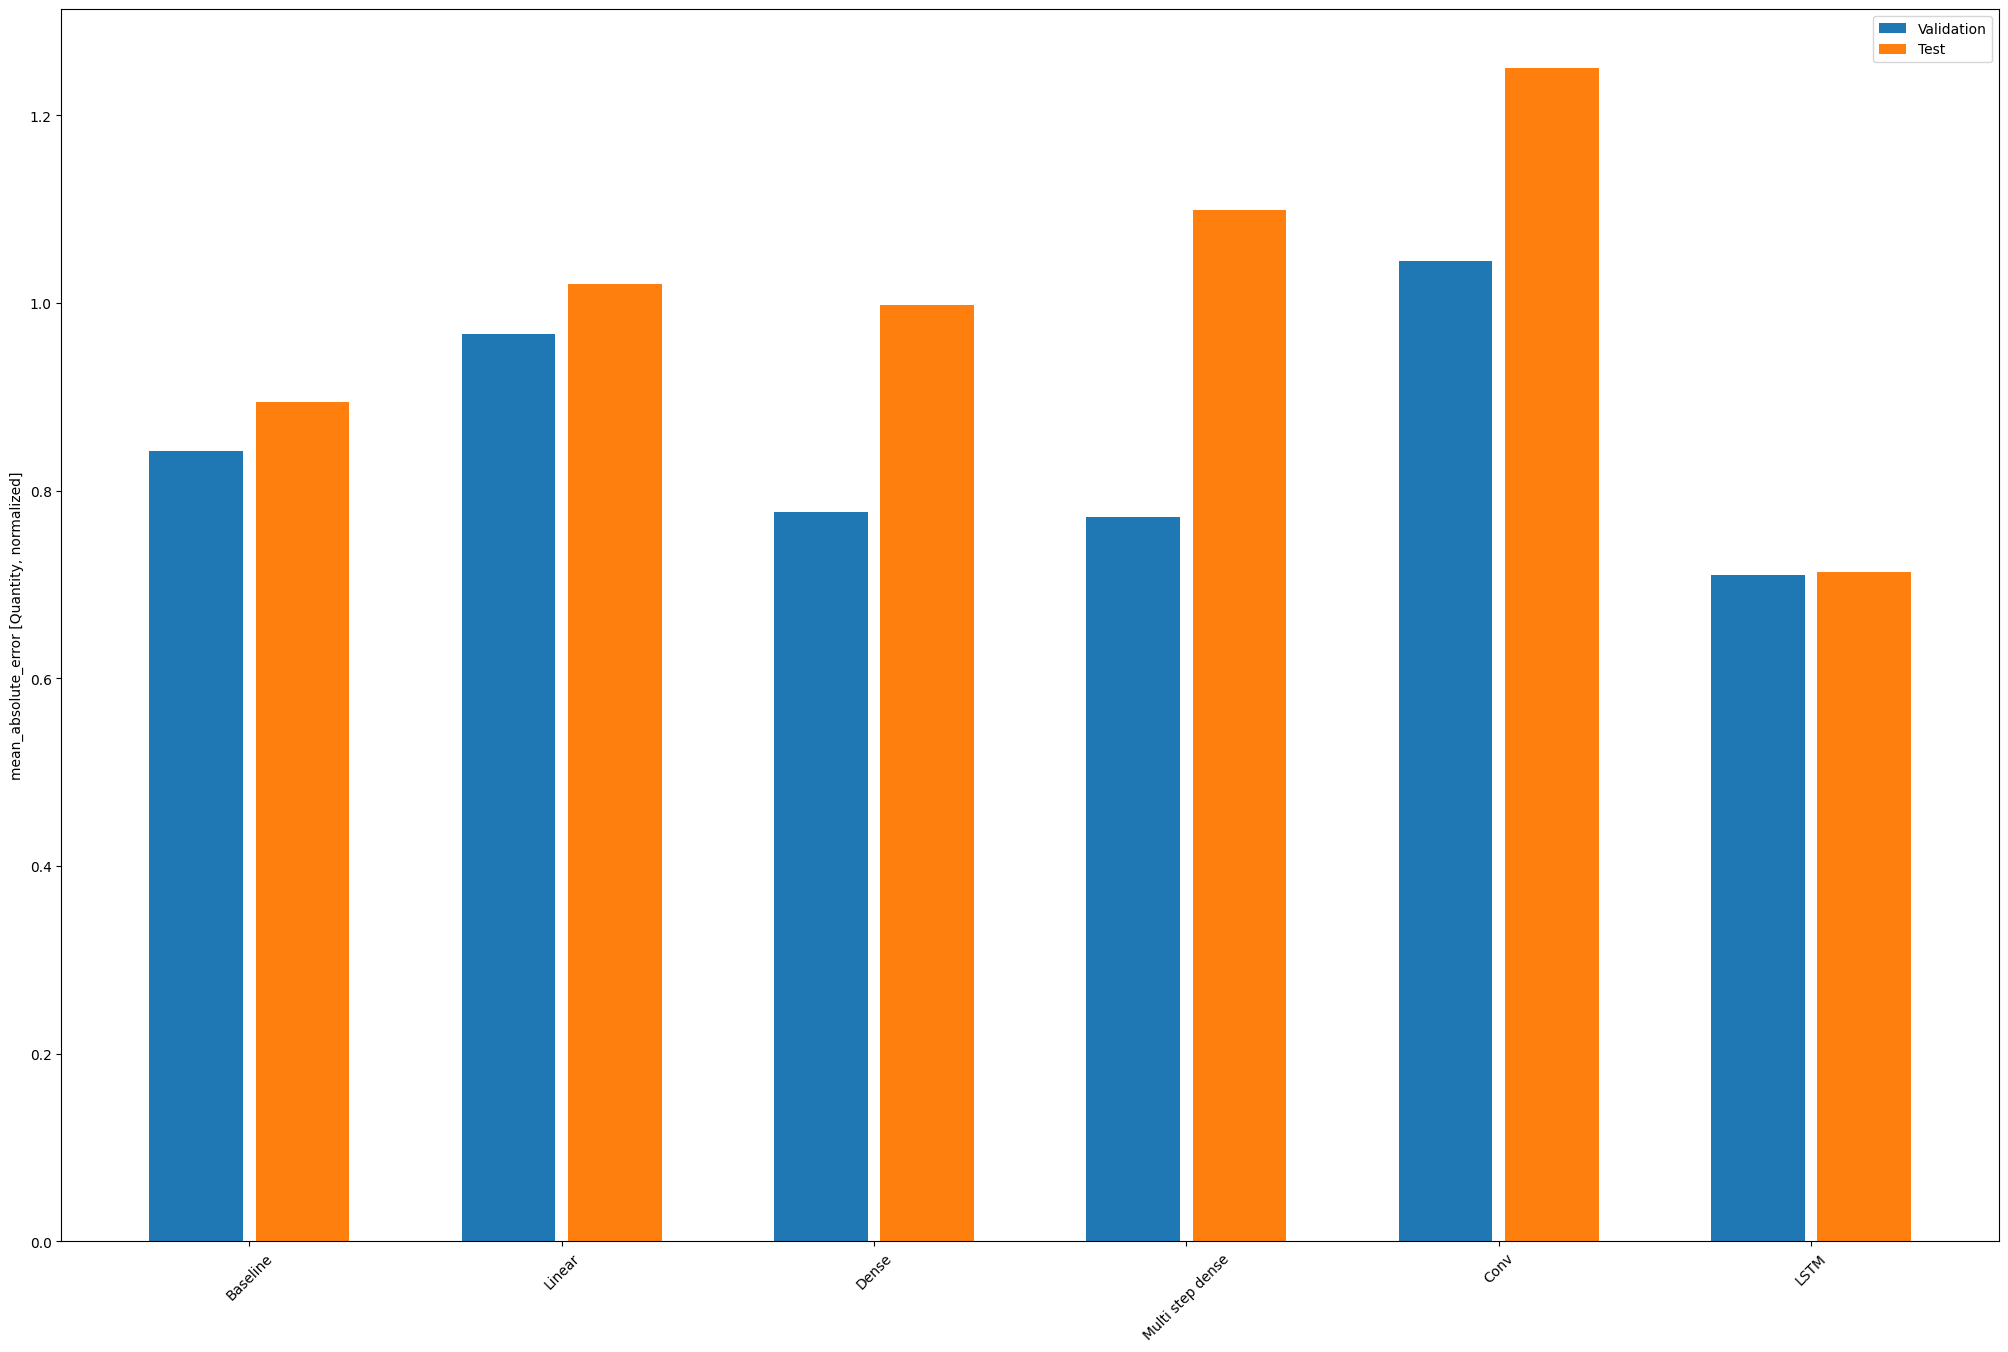

In [53]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [Quantity, normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()


In [135]:
for name, value in performance.items():
  print(f'{name:12s}: {value[1]:0.4f}')


Baseline    : 0.8943
Linear      : 1.2527
Dense       : 0.9087
Multi step dense: 0.8499
Conv        : 1.7280
LSTM        : 0.8209


## Multi-output

In [136]:
single_step_window = WindowGenerator(
    # `WindowGenerator` returns all features as labels if you 
    # don't set the `label_columns` argument.
    input_width=1, label_width=1, shift=1)

wide_window = WindowGenerator(
    input_width=21, label_width=21, shift=1)

for example_inputs, example_labels in wide_window.train.take(1):
  print(f'Inputs shape (batch, time, features): {example_inputs.shape}')
  print(f'Labels shape (batch, time, features): {example_labels.shape}')

Inputs shape (batch, time, features): (32, 21, 97)
Labels shape (batch, time, features): (32, 21, 97)


In [137]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=[tf.keras.metrics.MeanAbsoluteError()])

In [138]:
val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

2/2 [==============================] - 0s 3ms/step - loss: 2.3361 - mean_absolute_error: 0.5207


In [139]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=num_features)
])

In [140]:
history = compile_and_fit(dense, single_step_window)

IPython.display.clear_output()
val_performance['Dense'] = dense.evaluate(single_step_window.val)
performance['Dense'] = dense.evaluate(single_step_window.test, verbose=0)


2/2 [==============================] - 0s 4ms/step - loss: 2.2506 - mean_absolute_error: 0.9172


In [141]:
%%time
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=1)

lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=num_features)
])

history = compile_and_fit(lstm_model, wide_window)

IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate( wide_window.val)
performance['LSTM'] = lstm_model.evaluate( wide_window.test, verbose=0)

print()

1/1 [==============================] - 0s 170ms/step - loss: 2.3535 - mean_absolute_error: 0.8859

CPU times: user 9.19 s, sys: 1.52 s, total: 10.7 s
Wall time: 18.6 s


In [142]:
class ResidualWrapper(tf.keras.Model):
  def __init__(self, model):
    super().__init__()
    self.model = model

  def call(self, inputs, *args, **kwargs):
    delta = self.model(inputs, *args, **kwargs)

    # The prediction for each time step is the input
    # from the previous time step plus the delta
    # calculated by the model.
    return inputs + delta

In [143]:
%%time
residual_lstm = ResidualWrapper(
    tf.keras.Sequential([
    tf.keras.layers.LSTM(32, return_sequences=True),
    tf.keras.layers.Dense(
        num_features,
        # The predicted deltas should start small.
        # Therefore, initialize the output layer with zeros.
        kernel_initializer=tf.initializers.zeros())
]))

history = compile_and_fit(residual_lstm, wide_window)

IPython.display.clear_output()
val_performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.val)
performance['Residual LSTM'] = residual_lstm.evaluate(wide_window.test, verbose=0)
print()

1/1 [==============================] - 0s 144ms/step - loss: 2.2852 - mean_absolute_error: 0.5551



CPU times: user 8.62 s, sys: 821 ms, total: 9.45 s
Wall time: 14.2 s


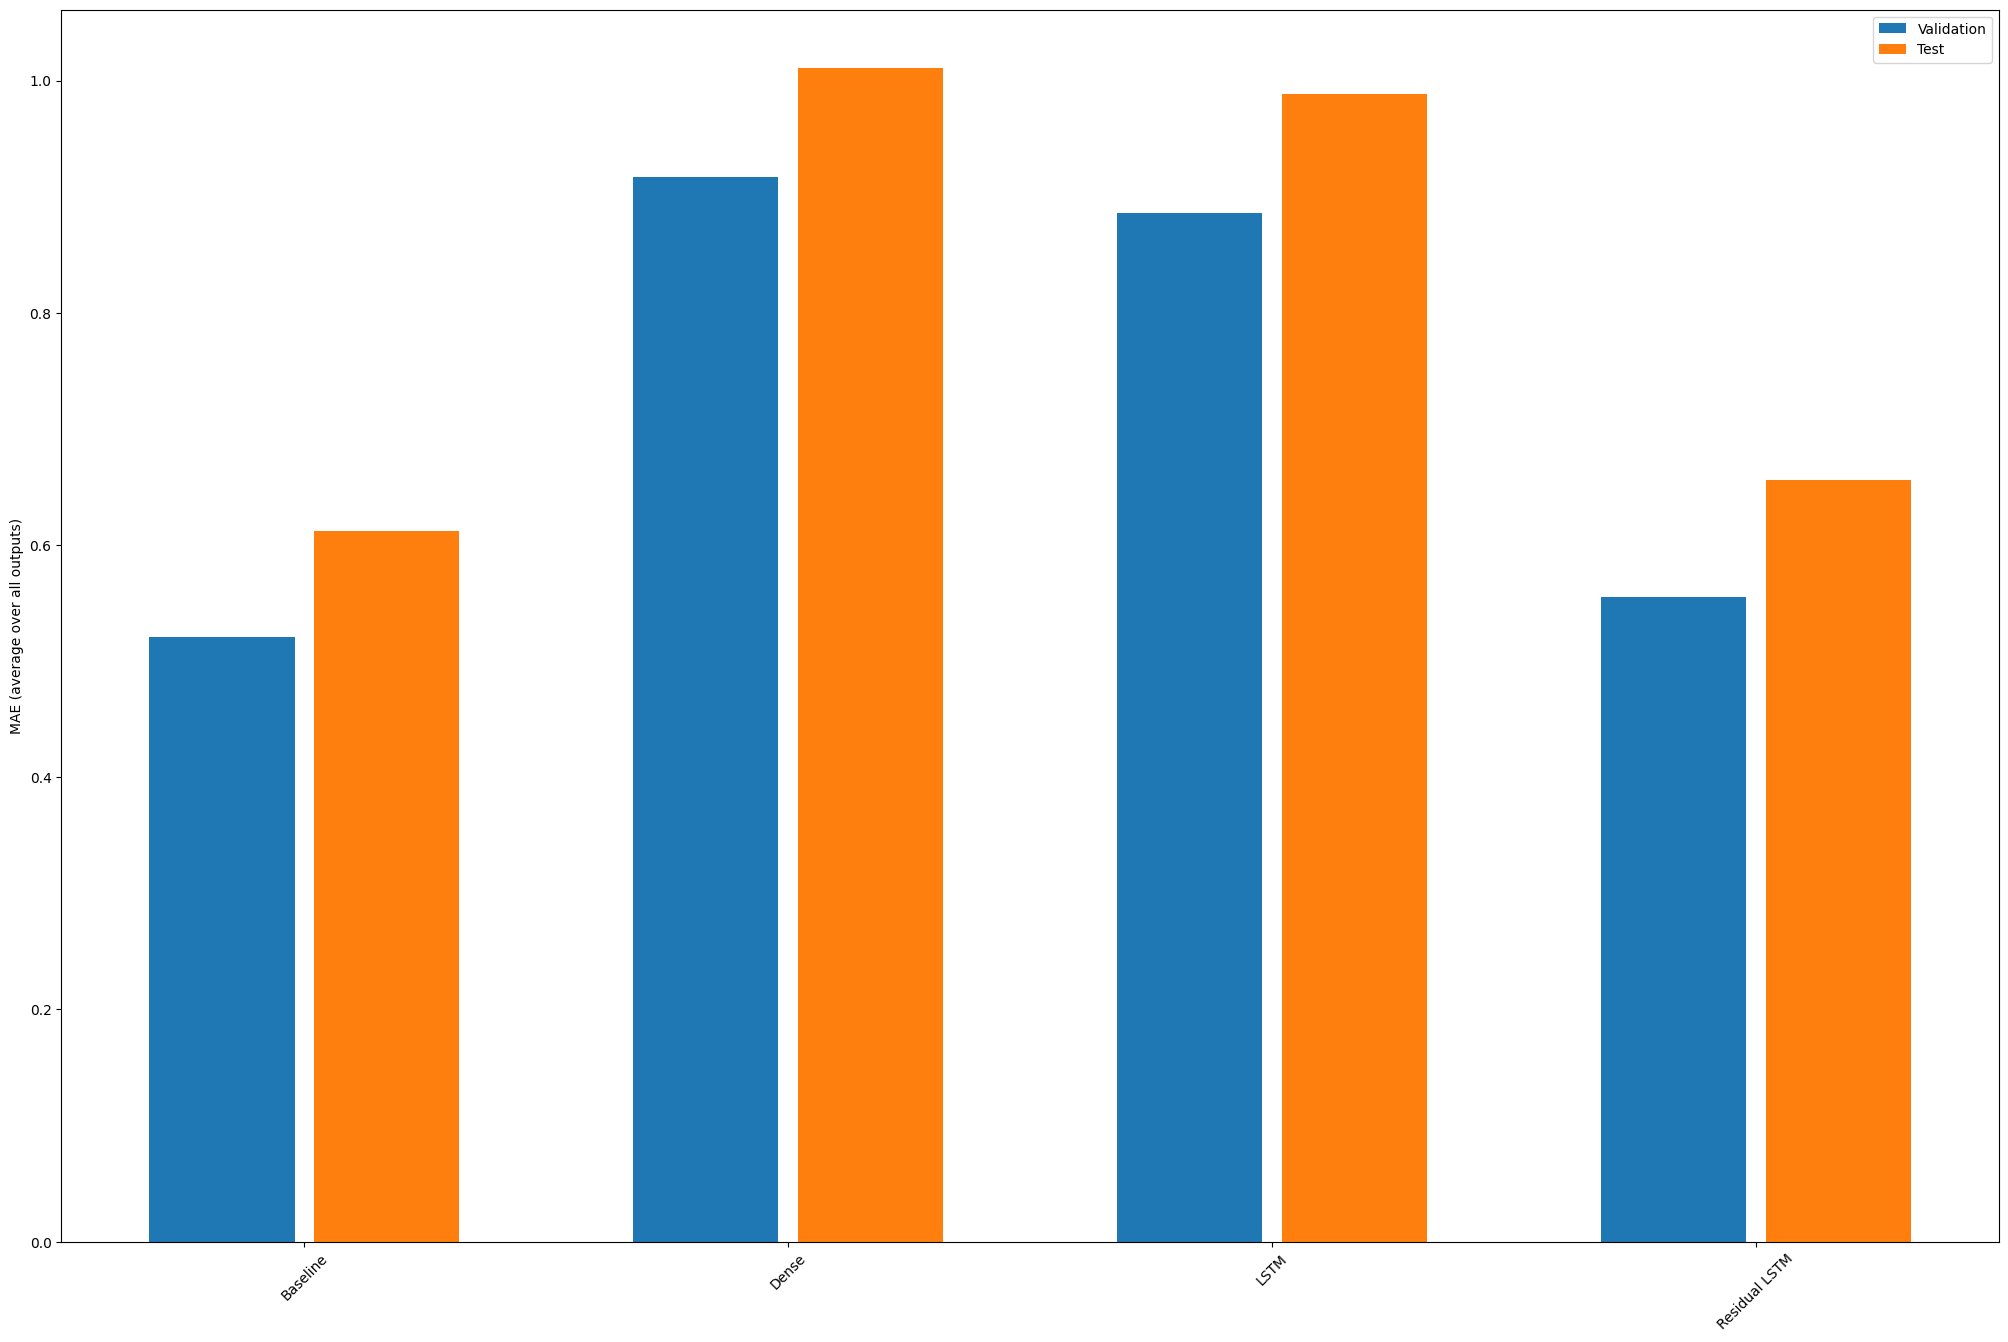

In [144]:
x = np.arange(len(performance))
width = 0.3

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
plt.ylabel('MAE (average over all outputs)')
_ = plt.legend()

In [145]:
for name, value in performance.items():
  print(f'{name:15s}: {value[1]:0.4f}')

Baseline       : 0.6124
Dense          : 1.0106
LSTM           : 0.9889
Residual LSTM  : 0.6559


# Multi-Step Models

Total window size: 48
Input indices: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Label indices: [24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Label column name(s): None

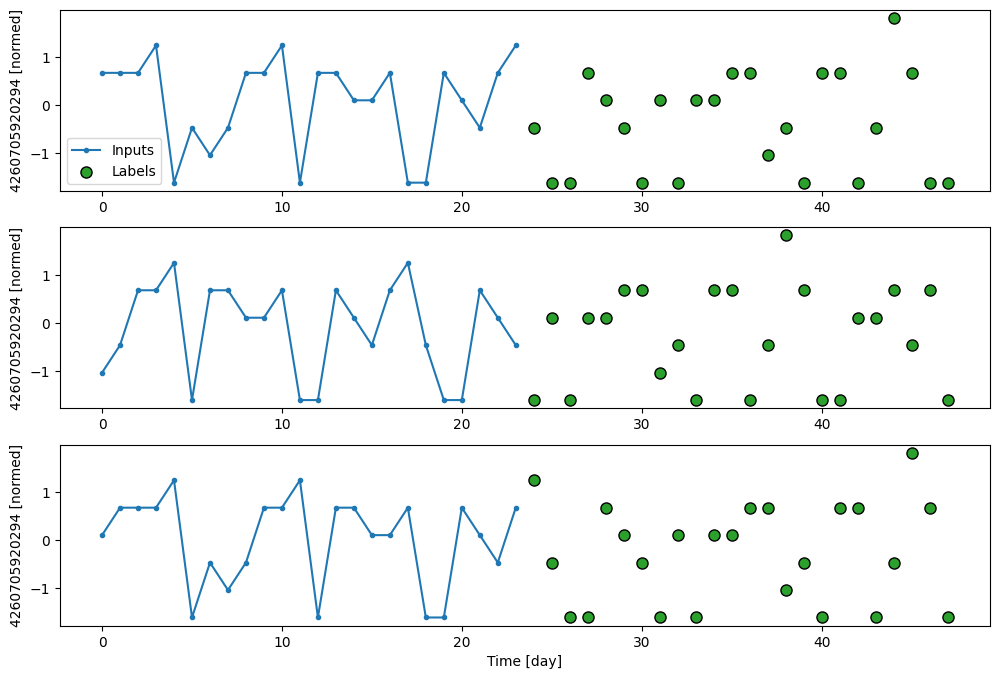

In [146]:
OUT_STEPS = 24
multi_window = WindowGenerator(input_width=24,
                               label_width=OUT_STEPS,
                               shift=OUT_STEPS)

multi_window.plot()
multi_window

## Baseline

1/1 [==============================] - 0s 364ms/step - loss: 2.7218 - mean_absolute_error: 0.7284


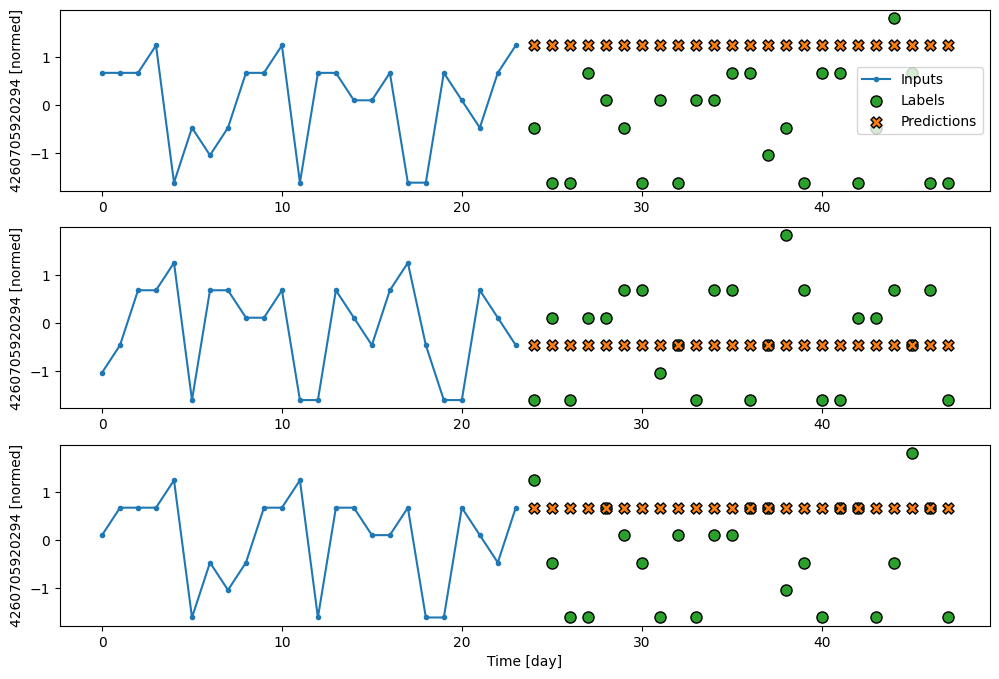

In [147]:
class MultiStepLastBaseline(tf.keras.Model):
  def call(self, inputs):
    return tf.tile(inputs[:, -1:, :], [1, OUT_STEPS, 1])

last_baseline = MultiStepLastBaseline()
last_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                      metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance = {}
multi_performance = {}

multi_val_performance['Last'] = last_baseline.evaluate(multi_window.val)
multi_performance['Last'] = last_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(last_baseline)


1/1 [==============================] - 0s 138ms/step - loss: 3.6060 - mean_absolute_error: 0.8654


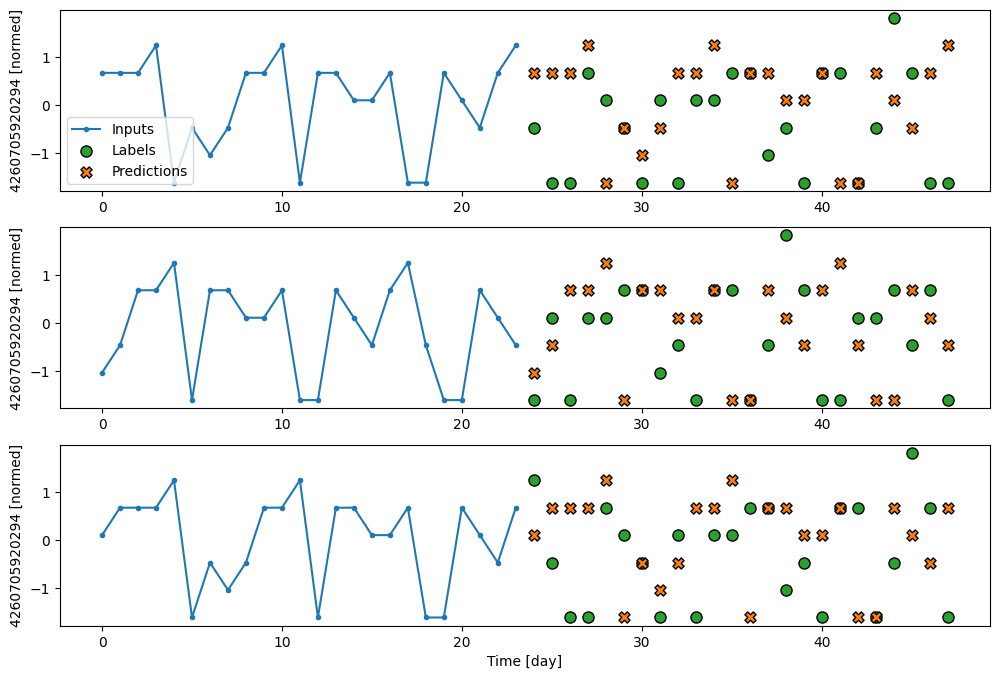

In [148]:
class RepeatBaseline(tf.keras.Model):
  def call(self, inputs):
    return inputs

repeat_baseline = RepeatBaseline()
repeat_baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                        metrics=[tf.keras.metrics.MeanAbsoluteError()])

multi_val_performance['Repeat'] = repeat_baseline.evaluate(multi_window.val)
multi_performance['Repeat'] = repeat_baseline.evaluate(multi_window.test, verbose=0)
multi_window.plot(repeat_baseline)


## Single-shot

1/1 [==============================] - 0s 54ms/step - loss: 2.2434 - mean_absolute_error: 0.8362


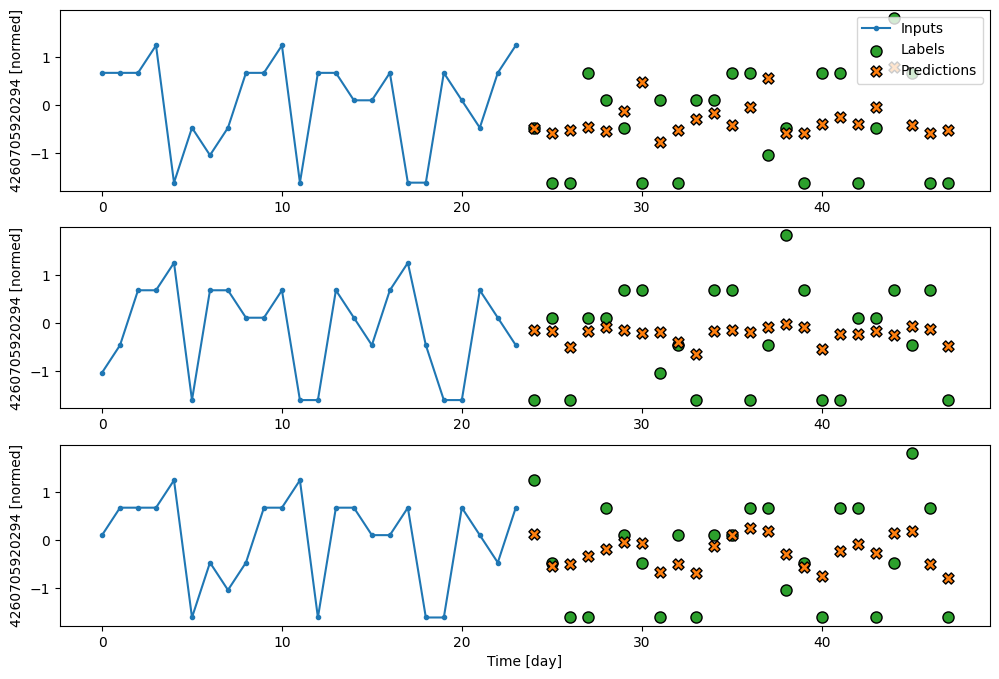

In [149]:
multi_linear_model = tf.keras.Sequential([
    # Take the last time-step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_linear_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Linear'] = multi_linear_model.evaluate(multi_window.val)
multi_performance['Linear'] = multi_linear_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_linear_model)


1/1 [==============================] - 0s 67ms/step - loss: 2.4500 - mean_absolute_error: 0.8302


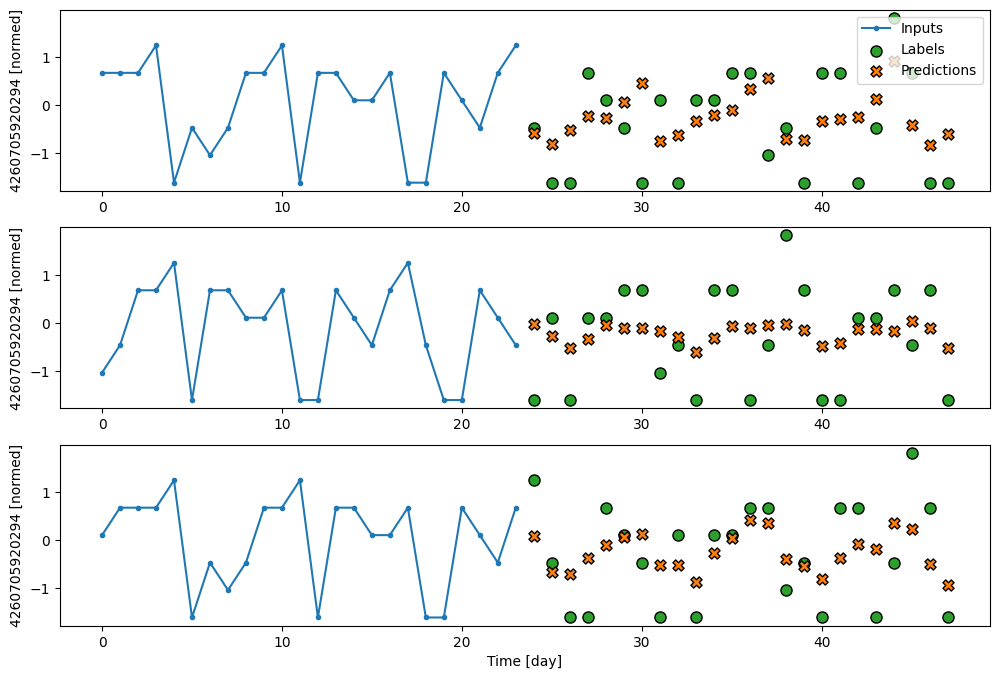

In [150]:
multi_dense_model = tf.keras.Sequential([
    # Take the last time step.
    # Shape [batch, time, features] => [batch, 1, features]
    tf.keras.layers.Lambda(lambda x: x[:, -1:, :]),
    # Shape => [batch, 1, dense_units]
    tf.keras.layers.Dense(512, activation='relu'),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_dense_model, multi_window)

IPython.display.clear_output()
multi_val_performance['Dense'] = multi_dense_model.evaluate(multi_window.val)
multi_performance['Dense'] = multi_dense_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_dense_model)

1/1 [==============================] - 0s 131ms/step - loss: 2.5046 - mean_absolute_error: 0.8494


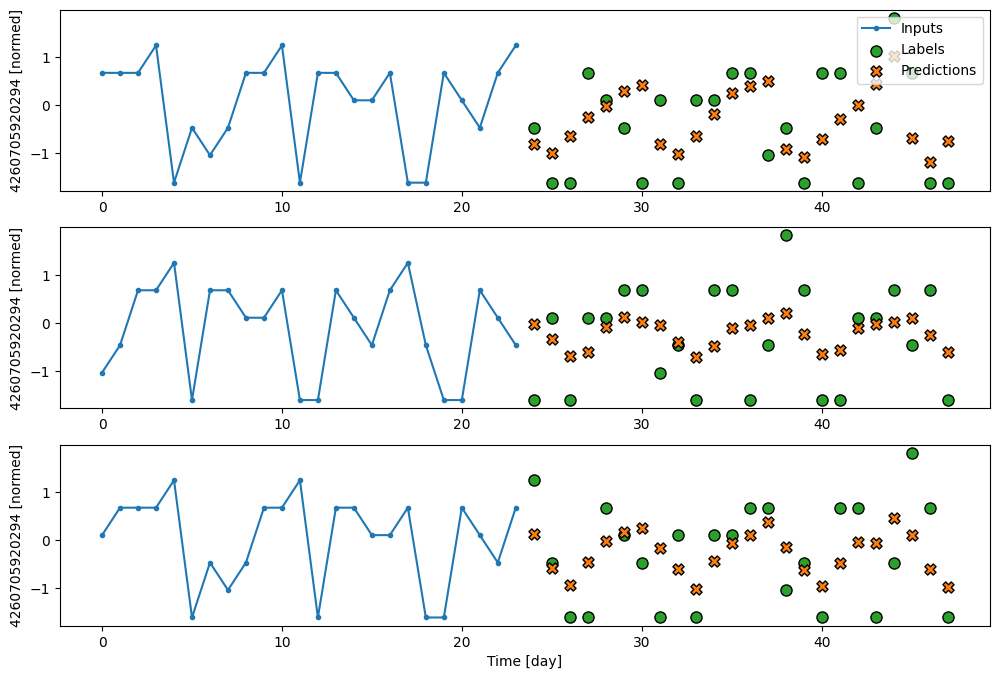

In [151]:
CONV_WIDTH = 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_conv_model, multi_window)

IPython.display.clear_output()

multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_conv_model)

1/1 [==============================] - 0s 62ms/step - loss: 2.6835 - mean_absolute_error: 0.8885


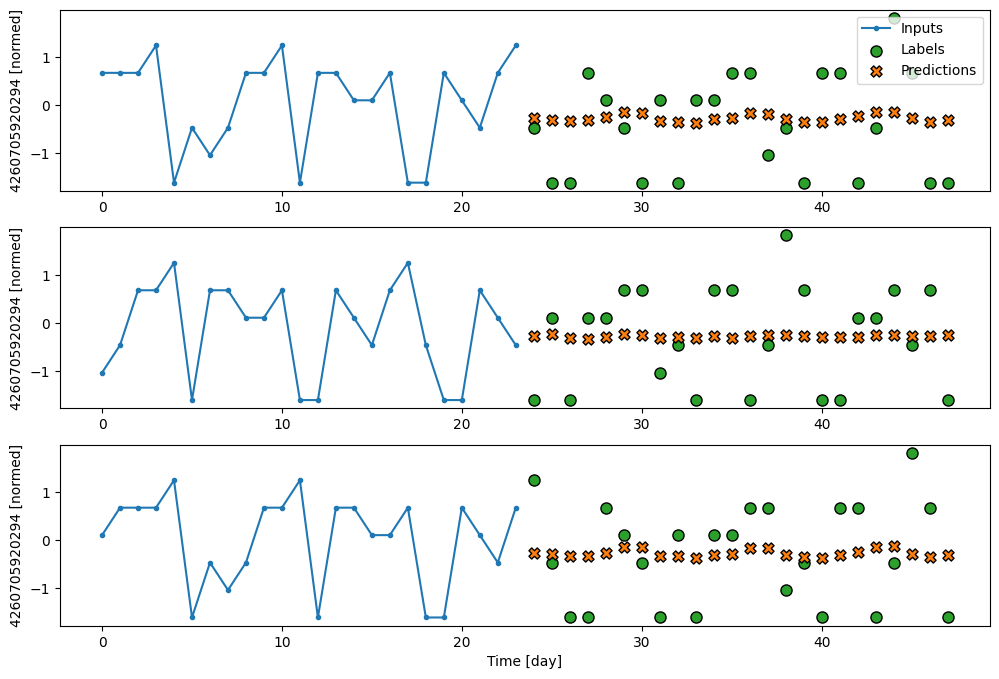

In [152]:
multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units].
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features].
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features].
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = compile_and_fit(multi_lstm_model, multi_window)

IPython.display.clear_output()

multi_val_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(multi_lstm_model)


## Autoregressive Models

In [153]:
class FeedBack(tf.keras.Model):
  def __init__(self, units, out_steps):
    super().__init__()
    self.out_steps = out_steps
    self.units = units
    self.lstm_cell = tf.keras.layers.LSTMCell(units)
    # Also wrap the LSTMCell in an RNN to simplify the `warmup` method.
    self.lstm_rnn = tf.keras.layers.RNN(self.lstm_cell, return_state=True)
    self.dense = tf.keras.layers.Dense(num_features)

feedback_model = FeedBack(units=32, out_steps=OUT_STEPS)


def warmup(self, inputs):
  # inputs.shape => (batch, time, features)
  # x.shape => (batch, lstm_units)
  x, *state = self.lstm_rnn(inputs)

  # predictions.shape => (batch, features)
  prediction = self.dense(x)
  return prediction, state

FeedBack.warmup = warmup


prediction, state = feedback_model.warmup(multi_window.example[0])
prediction.shape

TensorShape([32, 97])

In [154]:
def call(self, inputs, training=None):
  # Use a TensorArray to capture dynamically unrolled outputs.
  predictions = []
  # Initialize the LSTM state.
  prediction, state = self.warmup(inputs)

  # Insert the first prediction.
  predictions.append(prediction)

  # Run the rest of the prediction steps.
  for n in range(1, self.out_steps):
    # Use the last prediction as input.
    x = prediction
    # Execute one lstm step.
    x, state = self.lstm_cell(x, states=state,
                              training=training)
    # Convert the lstm output to a prediction.
    prediction = self.dense(x)
    # Add the prediction to the output.
    predictions.append(prediction)

  # predictions.shape => (time, batch, features)
  predictions = tf.stack(predictions)
  # predictions.shape => (batch, time, features)
  predictions = tf.transpose(predictions, [1, 0, 2])
  return predictions

FeedBack.call = call


In [155]:
print('Output shape (batch, time, features): ', feedback_model(multi_window.example[0]).shape)


Output shape (batch, time, features):  (32, 24, 97)


1/1 [==============================] - 0s 72ms/step - loss: 2.5678 - mean_absolute_error: 0.8572


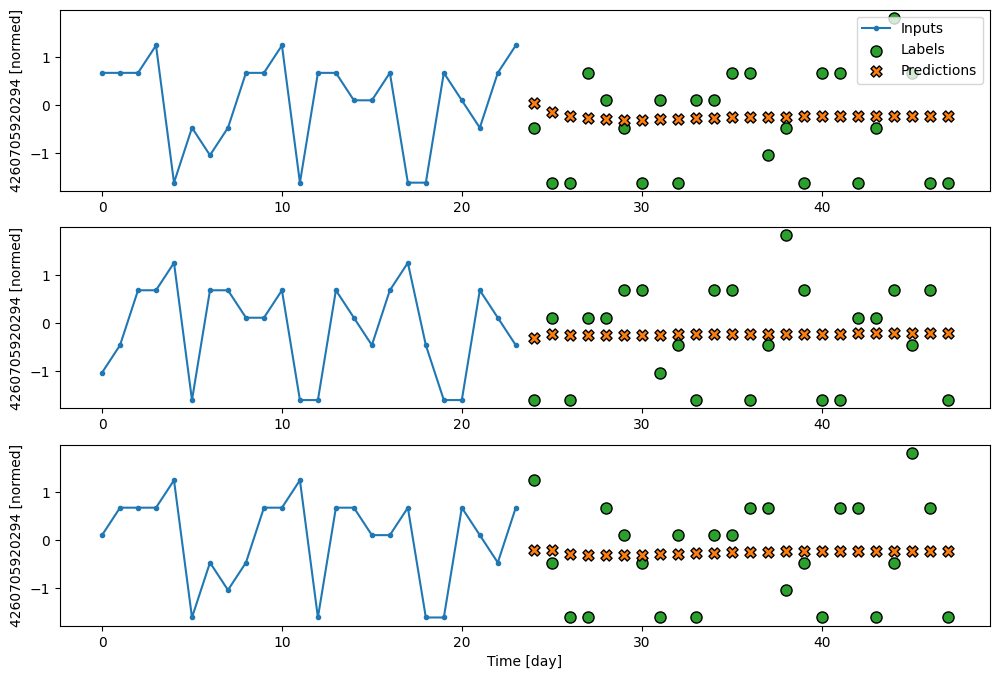

In [156]:
history = compile_and_fit(feedback_model, multi_window)

IPython.display.clear_output()

multi_val_performance['AR LSTM'] = feedback_model.evaluate(multi_window.val)
multi_performance['AR LSTM'] = feedback_model.evaluate(multi_window.test, verbose=0)
multi_window.plot(feedback_model)

In [157]:
x = np.arange(len(multi_performance))
width = 0.3
print(multi_val_performance.values())
print(multi_performance)

metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in multi_val_performance.values()]
test_mae = [v[metric_index] for v in multi_performance.values()]

plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=multi_performance.keys(),
           rotation=45)
plt.ylabel(f'MAE (average over all times and outputs)')
_ = plt.legend()

dict_values([[2.7217602729797363, 0.72838294506073], [3.60601544380188, 0.8653843998908997], [2.2434160709381104, 0.8362047076225281], [2.4499568939208984, 0.8301842212677002], [2.504617691040039, 0.8494267463684082], [2.6834590435028076, 0.8884788751602173], [2.5678188800811768, 0.8571969866752625]])
{'Last': [], 'Repeat': [], 'Linear': [], 'Dense': [], 'Conv': [], 'LSTM': [], 'AR LSTM': []}


IndexError: list index out of range

/usr/local/Caskroom/miniconda/base/envs/Melersed/lib/python3.9/site-packages/keras/utils/generic_utils.py:239: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: cannot convert float infinity to integer